<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">



# **Exploratory Data Analysis (EDA)**
## Inflação e desemprego: um ensaio do Brasil

In [1]:
#@title **Identificação do Grupo**

#@markdown Nomes completos em ordem alfabética (*\<nome\>, \<RA\>*)
Aluno1 = 'Ana Helena Arruda Cavalli Rosa Marcacini, 20.01305-0' #@param {type:"string"}
Aluno2 = 'Enrico Giannobile, 19.00610-0' #@param {type:"string"}
Aluno3 = 'Ettore Padula Dalben, 20.00387-0' #@param {type:"string"}
Aluno4 = 'Guilherme de Campos Mello Guerra Martins, 20.00089-8' #@param {type:"string"}
Aluno5 = 'Laura Caroline Pinto Correia, 20.00171-0' #@param {type:"string"}
Aluno6 = 'Luis Guilherme de Souza Munhoz, 20.01937-8' #@param {type:"string"}


## **Resumo** (*Abstract*)

This study aims to explore the interactions between the IPCA, the Phillips Curve, the SELIC rate, and other economic metrics within the Brazilian context. Key periods in the Brazilian economy will be analyzed using statistical tools such as correlation, covariance, and scatter plots. Additionally, the analysis will identify which goods exhibited the most significant price variations and how the Central Bank has utilized the SELIC rate to achieve its inflation targets over the years. Finally, the implications of these findings for the broader economy will be discussed.

Through this comprehensive analysis, the study seeks to provide a clear and detailed understanding of the forces shaping the Brazilian economy, offering insights for more informed decision-making and the development of more robust strategies in various economic scenarios.

# Introdução

Este trabalho tem como objetivo principal explorar as interações entre o IPCA, a Curva de Phillips, a taxa SELIC e demais métricas economicas no contexto brasileiro. Serão analisados períodos de destaque para a economia brasileira, utilizando ferramentas estatísticas como correlação, covariância e gráficos de dispersão. Também será investigado quais bens apresentaram maior variação de preços e como o Banco Central tem utilizado a SELIC para atingir suas metas de inflação ao longo dos anos. Por fim, serão discutidas as implicações dessas análises para a economia como um todo.

Através dessa análise abrangente, espera-se proporcionar uma visão clara e detalhada das forças que moldam a economia brasileira, oferecendo subsídios para decisões mais informadas e estratégias mais robustas nos diferentes contextos economicos.


# **Aquisição e Preparação dos dados**







In [2]:
%pip install ipeadatapy --quiet


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Importações

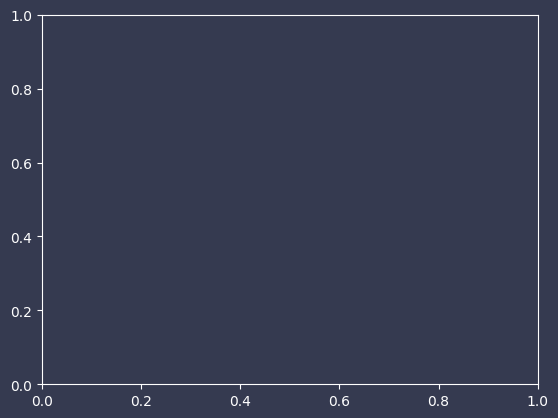

In [3]:
import pandas as pd
import numpy as np
import requests
import ipeadatapy
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(style=dict({'figure.facecolor': '#353a50', 'axes.facecolor': '#353a50', 'axes.edgecolor': 'white','axes.titlecolor': 'white', 'axes.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white', 'grid.color': 'white', 'text.color': 'white'}))
plt.gca().set_facecolor('#353a50')

## Importando os Dados

Foi optado extrair os dados via RPA e via biblioteca do IPEA para não depender de subir arquivos no drive

In [4]:
ipeadatapy.themes()

,ID,NAME
0,28,Agropecuária
1,23,Assistência social
2,10,Balanço de pagamentos
3,7,Câmbio
4,5,Comércio exterior
...,...,...
57,20,Segurança Pública
58,59,Senador
59,17,Sinopse macroeconômica
60,33,Transporte


In [5]:
ipeadatapy.countries()

,ID,COUNTRY
0,ZAF,África do Sul
1,DEU,Alemanha
2,LATI,América Latina
3,AGO,Angola
4,SAU,Arábia Saudita
...,...,...
67,TWN,Taiwan
68,TLS,Timor Leste (Ex-East Timor)
69,URY,Uruguai
70,VEN,Venezuela


In [6]:
# LINK : http://www.ipeadata.gov.br/Default.aspx (SPA)
# Taxa de desemprego (IBGE/Pnad)- INATIVA
# Fonte: Instituto Brasileiro de Geografia e Estatística
# Frequência: Anual de 1992 até 2014
# Unidade: (%)
# Comentário: Percentual das pessoas que procuraram, mas não encontraram ocupação profissional remunerada entre todas aquelas consideradas “ativas” no mercado de trabalho, grupo que inclui todas as pessoas com 10 anos ou mais de idade que estavam procurando ocupação ou trabalhando na semana de referência da Pesquisa Nacional por Amostra de Domicílios (Pnad). Elaboração: Disoc/Ipea. Série descontinuada.

anos = [1992,1993,1995,1996,1997,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2011,2012,2013,2014]
taxa_de_desemprego = [7.2,6.8,6.7,7.6,8.5,9.7,10.4,10.0,9.9,10.5,9.7,10.2,9.2,8.9,7.8,9.0,7.3,6.7,7.1,7.5]

ipea_desemprego_anual = pd.DataFrame(data=taxa_de_desemprego, index=anos,columns=['Desemprego(%)'])
ipea_desemprego_anual

,Desemprego(%)
1992,7.2
1993,6.8
1995,6.7
1996,7.6
1997,8.5
1998,9.7
1999,10.4
2001,10.0
2002,9.9
2003,10.5


### Dados do IPCA


IPCA (Índice de Preços ao Consumidor Amplo) é usado para observar tendências de inflação. É calculado com base no preço médio necessário para comprar um conjunto de bens de consumo e serviços num país, comparando com períodos anteriores. O índice, calculado por institutos nacionais de estatística, tem em conta a variação percentual dos preços de certos bens num determinado período, comparado com o período anterior, e é um dos índices económicos mais utilizados.

In [7]:
df_ipca = ipeadatapy.timeseries("PRECOS12_IPCAG12")
df_ipca.reset_index(inplace=True)
df_ipca

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
0,1980-01-01,PRECOS12_IPCAG12,1980-01-01T00:00:00-02:00,1,1,1980,6.615649
1,1980-02-01,PRECOS12_IPCAG12,1980-02-01T00:00:00-02:00,1,2,1980,4.616919
2,1980-03-01,PRECOS12_IPCAG12,1980-03-01T00:00:00-03:00,1,3,1980,6.038389
3,1980-04-01,PRECOS12_IPCAG12,1980-04-01T00:00:00-03:00,1,4,1980,5.286114
4,1980-05-01,PRECOS12_IPCAG12,1980-05-01T00:00:00-03:00,1,5,1980,5.702721
...,...,...,...,...,...,...,...
527,2023-12-01,PRECOS12_IPCAG12,2023-12-01T00:00:00-03:00,1,12,2023,0.560000
528,2024-01-01,PRECOS12_IPCAG12,2024-01-01T00:00:00-03:00,1,1,2024,0.420000
529,2024-02-01,PRECOS12_IPCAG12,2024-02-01T00:00:00-03:00,1,2,2024,0.830000
530,2024-03-01,PRECOS12_IPCAG12,2024-03-01T00:00:00-03:00,1,3,2024,0.160000


In [8]:
df_ipca_limpo =  df_ipca[["DATE","VALUE ((% a.m.))"]].rename(columns={'VALUE ((% a.m.))': 'IPCA ((% a.m.))'})
df_ipca_limpo

,DATE,IPCA ((% a.m.))
0,1980-01-01,6.615649
1,1980-02-01,4.616919
2,1980-03-01,6.038389
3,1980-04-01,5.286114
4,1980-05-01,5.702721
...,...,...
527,2023-12-01,0.560000
528,2024-01-01,0.420000
529,2024-02-01,0.830000
530,2024-03-01,0.160000


In [9]:
series_ipea = ipeadatapy.list_series()

In [10]:
lista = series_ipea.where((series_ipea["NAME"].str.contains("IPCA")) & (series_ipea["NAME"].str.contains("taxa de variação"))).dropna().tail(11)["NAME"]
indice = 0
ipcaCategorias = {}
print(f"Tabelas : {'| '.join(map(str, lista))}")
dfs = []
for bens in series_ipea.where((series_ipea["NAME"].str.contains("IPCA")) & (series_ipea["NAME"].str.contains("taxa de variação"))).dropna().tail(11)["CODE"]:
  ipcaCategorias[lista[indice]] = ipeadatapy.timeseries(bens)
  indice+=1
for chave, valor in ipcaCategorias.items():
  dfs.append(valor[["VALUE ((% a.m.))"]].rename(columns={'VALUE ((% a.m.))': f'{chave} ((% a.m.))'}))


df_IpcaCategorias = pd.concat(dfs, axis=1)
df_IpcaCategorias.dropna()

Tabelas : IPCA - alimentos e bebidas - taxa de variação| IPCA - artigos de residência - taxa de variação| IPCA - despesas pessoais - taxa de variação| IPCA - comunicação - taxa de variação| IPCA - educação, leitura e papelaria - taxa de variação| IPCA - geral - taxa de variação| IPCA - habitação - taxa de variação| IPCA - saúde e cuidados pessoais - taxa de variação| IPCA - RMSP - taxa de variação| IPCA - transportes - taxa de variação| IPCA - vestuário - taxa de variação
/tmp/ipykernel_75/3016743008.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ipcaCategorias[lista[indice]] = ipeadatapy.timeseries(bens)
/tmp/ipykernel_75/3016743008.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with

,IPCA - alimentos e bebidas - taxa de variação ((% a.m.)),IPCA - artigos de residência - taxa de variação ((% a.m.)),IPCA - despesas pessoais - taxa de variação ((% a.m.)),IPCA - comunicação - taxa de variação ((% a.m.)),"IPCA - educação, leitura e papelaria - taxa de variação ((% a.m.))",IPCA - geral - taxa de variação ((% a.m.)),IPCA - habitação - taxa de variação ((% a.m.)),IPCA - saúde e cuidados pessoais - taxa de variação ((% a.m.)),IPCA - RMSP - taxa de variação ((% a.m.)),IPCA - transportes - taxa de variação ((% a.m.)),IPCA - vestuário - taxa de variação ((% a.m.))
DATE,,,,,,,,,,,
1995-02-01,-0.06,2.99,0.80,0.00,2.82,1.019599,3.65,3.10,1.37,0.95,-1.19
1995-03-01,1.44,1.65,2.14,0.00,0.94,1.550350,3.82,2.66,1.56,0.75,-0.69
1995-04-01,1.99,2.36,4.08,0.00,6.33,2.430000,4.24,2.14,2.69,0.73,2.62
1995-05-01,0.51,2.05,8.51,0.00,5.03,2.670000,2.94,3.55,2.29,1.29,2.64
1995-06-01,-0.25,1.56,3.47,0.00,6.25,2.260000,4.32,4.19,2.29,4.14,1.21
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,1.11,0.76,0.48,0.04,0.24,0.560000,0.34,0.35,0.54,0.48,0.70
2024-01-01,1.38,0.22,0.82,-0.08,0.33,0.420000,0.25,0.83,0.25,-0.65,0.14
2024-02-01,0.95,-0.07,0.05,1.56,4.98,0.830000,0.27,0.65,0.93,0.72,-0.44


In [11]:
lista = series_ipea.where((series_ipea["NAME"].str.contains("IPCA")) & (series_ipea["NAME"].str.contains("taxa de variação"))).dropna()["NAME"].iloc[7:11]
indice = 0
ipcaBens = {}
print(f"Tabelas : {'| '.join(map(str, lista))}")
dfs = []
for bens in series_ipea.where((series_ipea["NAME"].str.contains("IPCA")) & (series_ipea["NAME"].str.contains("taxa de variação"))).dropna()["CODE"].iloc[7:11]:
  ipcaBens[lista[indice]] = ipeadatapy.timeseries(bens)
  indice+=1
for chave, valor in ipcaBens.items():
  dfs.append(valor[["VALUE ((% a.m.))"]].rename(columns={'VALUE ((% a.m.))': f'{chave} ((% a.m.))'}))


df_ipcaBens = pd.concat(dfs, axis=1)
df_ipcaBens.dropna()

Tabelas : IPCA - preços livres - bens duráveis - taxa de variação| IPCA - preços livres - bens não duráveis - taxa de variação| IPCA - preços livres - bens semi duráveis - taxa de variação| IPCA - preços livres - serviços - taxa de variação
/tmp/ipykernel_75/1655985241.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ipcaBens[lista[indice]] = ipeadatapy.timeseries(bens)
/tmp/ipykernel_75/1655985241.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ipcaBens[lista[indice]] = ipeadatapy.timeseries(bens)
/tmp/ipykernel_75/1655985241.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In

,IPCA - preços livres - bens duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - bens não duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - bens semi duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - serviços - taxa de variação ((% a.m.))
DATE,,,,
1992-01-01,29.15,28.12,13.80,25.84
1992-02-01,26.29,25.28,17.78,22.17
1992-03-01,21.07,22.16,19.09,20.74
1992-04-01,13.20,20.43,23.43,20.14
1992-05-01,21.67,26.10,23.89,26.93
...,...,...,...,...
2023-12-01,0.21,0.91,0.68,0.60
2024-01-01,0.21,1.41,0.33,0.02
2024-02-01,0.22,0.95,-0.26,1.06


In [12]:
series_ipea.where(series_ipea["NAME"].str.contains("PIB")).dropna()

,CODE,NAME
4171,WDI_PPCTAXAPIB,Taxa de paridade do poder de compra (PPC) - PI...
4172,BM_PIBUSDCM,PIB - câmbio médio
4173,BM_PIBUSDPPC,PIB - conceito: paridade do poder de compra (P...
4174,BM12_PIB12,PIB
4175,BM12_PIBAC12,PIB - acumulado em 12 meses
...,...,...
8783,PIBSCE,PIB Estadual (valor adicionado a preços básico...
8784,PIBSE,PIB Municipal (valor adicionado a preços básic...
8785,PIBSEE,PIB Estadual (valor adicionado a preços básico...
8786,PIBTAE,PIB Estadual (valor adicionado a preços básico...


In [13]:
# Pib do Brasil ao ANO em Bilhões de Doláres (USD)
df_PIB = ipeadatapy.timeseries("WEO_PIBWEOBRA")
df_PIB

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1980-01-01,WEO_PIBWEOBRA,1980-01-01T00:00:00-02:00,1,1,1980,145.819
1981-01-01,WEO_PIBWEOBRA,1981-01-01T00:00:00-02:00,1,1,1981,167.583
1982-01-01,WEO_PIBWEOBRA,1982-01-01T00:00:00-02:00,1,1,1982,179.166
1983-01-01,WEO_PIBWEOBRA,1983-01-01T00:00:00-02:00,1,1,1983,143.652
1984-01-01,WEO_PIBWEOBRA,1984-01-01T00:00:00-02:00,1,1,1984,142.957
1985-01-01,WEO_PIBWEOBRA,1985-01-01T00:00:00-02:00,1,1,1985,226.938
1986-01-01,WEO_PIBWEOBRA,1986-01-01T00:00:00-02:00,1,1,1986,263.256
1987-01-01,WEO_PIBWEOBRA,1987-01-01T00:00:00-02:00,1,1,1987,286.539
1988-01-01,WEO_PIBWEOBRA,1988-01-01T00:00:00-02:00,1,1,1988,320.105


In [14]:
df_PIB.dtypes

CODE            object
RAW DATE        object
DAY              int32
MONTH            int32
YEAR             int32
VALUE (US$)    float64
dtype: object

In [15]:
df_pib_limpo = df_PIB[["RAW DATE","VALUE (US$)"]].rename(columns={"VALUE (US$)": 'PIB (US$)'})
df_pib_limpo

,RAW DATE,PIB (US$)
DATE,,
1980-01-01,1980-01-01T00:00:00-02:00,145.819
1981-01-01,1981-01-01T00:00:00-02:00,167.583
1982-01-01,1982-01-01T00:00:00-02:00,179.166
1983-01-01,1983-01-01T00:00:00-02:00,143.652
1984-01-01,1984-01-01T00:00:00-02:00,142.957
1985-01-01,1985-01-01T00:00:00-02:00,226.938
1986-01-01,1986-01-01T00:00:00-02:00,263.256
1987-01-01,1987-01-01T00:00:00-02:00,286.539
1988-01-01,1988-01-01T00:00:00-02:00,320.105


In [16]:
ipeadatapy.timeseries("BM12_NUCLEOPIPCA12")

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
DATE,,,,,,
1995-01-01,BM12_NUCLEOPIPCA12,1995-01-01T00:00:00-02:00,1,1,1995,1.66
1995-02-01,BM12_NUCLEOPIPCA12,1995-02-01T00:00:00-02:00,1,2,1995,1.36
1995-03-01,BM12_NUCLEOPIPCA12,1995-03-01T00:00:00-03:00,1,3,1995,1.51
1995-04-01,BM12_NUCLEOPIPCA12,1995-04-01T00:00:00-03:00,1,4,1995,2.45
1995-05-01,BM12_NUCLEOPIPCA12,1995-05-01T00:00:00-03:00,1,5,1995,2.44
...,...,...,...,...,...,...
2023-12-01,BM12_NUCLEOPIPCA12,2023-12-01T00:00:00-03:00,1,12,2023,0.43
2024-01-01,BM12_NUCLEOPIPCA12,2024-01-01T00:00:00-03:00,1,1,2024,0.45
2024-02-01,BM12_NUCLEOPIPCA12,2024-02-01T00:00:00-03:00,1,2,2024,0.53


In [17]:
series_ipea.where(series_ipea["NAME"].str.contains("IPCA")).dropna()

,CODE,NAME
4626,BM12_IPCA2012,IPCA - núcleo médias aparadas com suavização -...
4627,BM12_IPCA20N12,IPCA - núcleo médias aparadas sem suavização ...
4628,BM12_IPCACOM12,IPCA - preços livres - comercializáveis - taxa...
4629,BM12_IPCAEXC12,IPCA - núcleo por exclusão - sem monitorados e...
4630,BM12_IPCAEXCEX212,IPCA - núcleo por exclusão - EX1 - taxa de var...
4631,BM12_IPCAEXP1212,Expectativa média de Inflação - IPCA - taxa ac...
4632,BM12_IPCAEXP612,Expectativa média de Inflação - IPCA - taxa an...
4633,BM12_IPCANCOM12,IPCA - preços livres - não comercializáveis - ...
4634,BM12_IPCAPL12,IPCA - preços livres - taxa de variação
4635,BM12_IPCAPLBD12,IPCA - preços livres - bens duráveis - taxa de...


In [18]:
df = ipeadatapy.timeseries("PRECOS_IPCAG")
df

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.a.))
DATE,,,,,,
1980-01-01,PRECOS_IPCAG,1980-01-01T00:00:00-02:00,1,1,1980,99.250489
1981-01-01,PRECOS_IPCAG,1981-01-01T00:00:00-02:00,1,1,1981,95.623044
1982-01-01,PRECOS_IPCAG,1982-01-01T00:00:00-02:00,1,1,1982,104.790433
1983-01-01,PRECOS_IPCAG,1983-01-01T00:00:00-02:00,1,1,1983,164.012024
1984-01-01,PRECOS_IPCAG,1984-01-01T00:00:00-02:00,1,1,1984,215.263326
1985-01-01,PRECOS_IPCAG,1985-01-01T00:00:00-02:00,1,1,1985,242.229795
1986-01-01,PRECOS_IPCAG,1986-01-01T00:00:00-02:00,1,1,1986,79.664497
1987-01-01,PRECOS_IPCAG,1987-01-01T00:00:00-02:00,1,1,1987,363.411524
1988-01-01,PRECOS_IPCAG,1988-01-01T00:00:00-02:00,1,1,1988,980.213487


In [19]:
series_ipea.where(series_ipea["NAME"].str.contains("desemprego")).dropna()

,CODE,NAME
5646,ECONMI12_ALU12,taxa de desemprego - força de trabalho
5652,ECONMI12_CAU12,taxa de desemprego - força de trabalho
5663,ECONMI12_FRU12,taxa de desemprego - força de trabalho
5668,ECONMI12_ITU12,taxa de desemprego - força de trabalho
5675,ECONMI12_JPU12,taxa de desemprego - força de trabalho
...,...,...
9875,PNADCT_TXDSCUPUF_EMC,Taxa de desemprego - ensino médio completo ou ...
9876,PNADCT_TXDSCUPUF_EMI,Taxa de desemprego - ensino médio incompleto o...
9877,PNADCT_TXDSCUPUF_ESC,Taxa de desemprego - ensino superior completo ...
9878,PNADCT_TXDSCUPUF_ESI,Taxa de desemprego - ensino superior incomplet...


## Inflação

​Inflação é o aumento dos preços de bens e serviços. Ela implica diminuição do poder de compra da moeda. A inflação é medida pelos índices de preços. O Brasil tem vários índices de preços. Entre eles o Índice Nacional de Preços ao Consumidor Amplo (IPCA) é o índice utilizado no sistema de metas para a inflação.

In [20]:
df_inflacao_ipc = ipeadatapy.timeseries("FIPE_FIPE0001")
df_inflacao_ipc

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.a.))
DATE,,,,,,
1940-01-01,FIPE_FIPE0001,1940-01-01T00:00:00-02:00,1,1,1940,9.307732
1941-01-01,FIPE_FIPE0001,1941-01-01T00:00:00-02:00,1,1,1941,11.280400
1942-01-01,FIPE_FIPE0001,1942-01-01T00:00:00-02:00,1,1,1942,15.722788
1943-01-01,FIPE_FIPE0001,1943-01-01T00:00:00-02:00,1,1,1943,19.208748
1944-01-01,FIPE_FIPE0001,1944-01-01T00:00:00-02:00,1,1,1944,37.381646
...,...,...,...,...,...,...
2019-01-01,FIPE_FIPE0001,2019-01-01T00:00:00-02:00,1,1,2019,4.400740
2020-01-01,FIPE_FIPE0001,2020-01-01T00:00:00-03:00,1,1,2020,5.615220
2021-01-01,FIPE_FIPE0001,2021-01-01T00:00:00-03:00,1,1,2021,9.728673


### Desemprego Brasil
#### Taxa de Desemprego

A taxa de desemprego é um indicador econômico crucial que mede a proporção da força de trabalho que está desempregada e ativamente procurando emprego em relação ao total da força de trabalho. 

In [21]:
df_desemprego = ipeadatapy.timeseries("WEO_DESEMWEOBRA")
df_desemprego

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((%))
DATE,,,,,,
1991-01-01,WEO_DESEMWEOBRA,1991-01-01T00:00:00-02:00,1,1,1991,10.1
1992-01-01,WEO_DESEMWEOBRA,1992-01-01T00:00:00-02:00,1,1,1992,11.6
1993-01-01,WEO_DESEMWEOBRA,1993-01-01T00:00:00-02:00,1,1,1993,11.0
1994-01-01,WEO_DESEMWEOBRA,1994-01-01T00:00:00-02:00,1,1,1994,10.5
1995-01-01,WEO_DESEMWEOBRA,1995-01-01T00:00:00-02:00,1,1,1995,9.9
1996-01-01,WEO_DESEMWEOBRA,1996-01-01T00:00:00-02:00,1,1,1996,11.2
1997-01-01,WEO_DESEMWEOBRA,1997-01-01T00:00:00-02:00,1,1,1997,11.6
1998-01-01,WEO_DESEMWEOBRA,1998-01-01T00:00:00-02:00,1,1,1998,14.7
1999-01-01,WEO_DESEMWEOBRA,1999-01-01T00:00:00-02:00,1,1,1999,14.7


### Mesclando dataframe para plotar curva de Phillips

In [22]:
df_phil = df_desemprego.merge(df_inflacao_ipc, on=["RAW DATE", "DAY", "MONTH", "YEAR"])
df_phil = df_phil.where(df_phil["YEAR"] >= 1999).dropna()
df_phil = df_phil.rename(columns={"VALUE ((%))": "Desemprego", "VALUE ((% a.a.))": "Inflação"})

### Ipca bacen

O IPCA-Bacen, ou Índice de Preços ao Consumidor Amplo calculado e monitorado pelo Banco Central do Brasil, é um dos mais importantes indicadores econômicos do país. Utilizado como referência oficial para a meta de inflação, o IPCA-Bacen desempenha um papel crucial na formulação e condução da política monetária brasileira. Este índice, calculado mensalmente pelo Instituto Brasileiro de Geografia e Estatística (IBGE) e publicado pelo Banco Central, reflete a variação dos preços de uma ampla cesta de bens e serviços consumidos pelas famílias brasileiras com rendimentos entre 1 e 40 salários mínimos, abrangendo diversas regiões metropolitanas do país.

In [23]:
# extraindo dados da API do Bacen
params = {
    "tronco": "estatisticas",
    "guidLista": "323626f4-c92f-46d6-bac7-55bf88f6430b",
    "dataInicial": "01/01/1980",
    "dataFinal": "01/01/2028",
    "serie": "13522",
}
url = "https://www.bcb.gov.br/api/servico/sitebcb/bcdatasgs"
resp = requests.get(url, params=params)
df_ipca_acumulado12 = pd.DataFrame(resp.json()["conteudo"])
df_ipca_acumulado12["data"] = pd.to_datetime(df_ipca_acumulado12["data"], dayfirst=True)
df_ipca_acumulado12.rename(columns={"data": "DateTime", "valor": "IPCA ocorrido"}, inplace=True)
df_ipca_acumulado12

,DateTime,IPCA ocorrido
0,1980-12-01,99.25
1,1981-01-01,99.67
2,1981-02-01,103.07
3,1981-03-01,101.03
4,1981-04-01,103.27
...,...,...
516,2023-12-01,4.62
517,2024-01-01,4.51
518,2024-02-01,4.50
519,2024-03-01,3.93


### Meta para Selic

A taxa Selic é a taxa básica de juros da economia, que influencia outras taxas de juros do país, como taxas de empréstimos, financiamentos e aplicações financeiras. A definição da taxa Selic é o principal instrumento de política monetária utilizado pelo Banco Central (BC) para controlar a inflação.



In [24]:
# extraindo dados da API do Bacen
params = {
    "tronco": "estatisticas",
    "guidLista": "323626f4-c92f-46d6-bac7-55bf88f6430b",
    "dataInicial": "25/05/2000",
    "dataFinal": "25/05/2024",
    "serie": "432",
}

url = "https://www.bcb.gov.br/api/servico/sitebcb/bcdatasgs"
resp = requests.get(url, params=params)
df_meta_selic = pd.DataFrame(resp.json()["conteudo"])
df_meta_selic["data"] = pd.to_datetime(df_meta_selic["data"], dayfirst=True)
df_meta_selic.rename(columns={"data": "DateTime", "valor": "Meta para a taxa Selic"}, inplace=True)
df_meta_selic

,DateTime,Meta para a taxa Selic
0,2000-05-25,18.50
1,2000-05-26,18.50
2,2000-05-27,18.50
3,2000-05-28,18.50
4,2000-05-29,18.50
...,...,...
8762,2024-05-21,10.50
8763,2024-05-22,10.50
8764,2024-05-23,10.50
8765,2024-05-24,10.50


### Selic

In [25]:
df_selic = ipeadatapy.timeseries("BM12_TJOVER12")
df_selic.reset_index(inplace=True)
df_selic


,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
0,1974-01-01,BM12_TJOVER12,1974-01-01T00:00:00-02:00,1,1,1974,1.46
1,1974-02-01,BM12_TJOVER12,1974-02-01T00:00:00-02:00,1,2,1974,1.15
2,1974-03-01,BM12_TJOVER12,1974-03-01T00:00:00-03:00,1,3,1974,1.16
3,1974-04-01,BM12_TJOVER12,1974-04-01T00:00:00-03:00,1,4,1974,1.21
4,1974-05-01,BM12_TJOVER12,1974-05-01T00:00:00-03:00,1,5,1974,1.24
...,...,...,...,...,...,...,...
601,2024-02-01,BM12_TJOVER12,2024-02-01T00:00:00-03:00,1,2,2024,0.80
602,2024-03-01,BM12_TJOVER12,2024-03-01T00:00:00-03:00,1,3,2024,0.83
603,2024-04-01,BM12_TJOVER12,2024-04-01T00:00:00-03:00,1,4,2024,0.89
604,2024-05-01,BM12_TJOVER12,2024-05-01T00:00:00-03:00,1,5,2024,0.83


In [26]:
df_selic_limpo = df_selic[["DATE","VALUE ((% a.m.))"]].rename(columns={'VALUE ((% a.m.))': 'selic ((% a.m.))'})
df_selic_limpo

,DATE,selic ((% a.m.))
0,1974-01-01,1.46
1,1974-02-01,1.15
2,1974-03-01,1.16
3,1974-04-01,1.21
4,1974-05-01,1.24
...,...,...
601,2024-02-01,0.80
602,2024-03-01,0.83
603,2024-04-01,0.89
604,2024-05-01,0.83


### Dados IPC-Br

In [27]:
# extraindo dados da API do Bacen
params = {
    "tronco": "estatisticas",
    "guidLista": "E6FED50C-BBEC-4A7C-B5AE-8899157E4AE2",
    "data": "2004/05/24",
}

url = "https://www.bcb.gov.br/api/servico/sitebcb/datavalor"
resp = requests.get(url, params=params)
df_ipcbr = pd.DataFrame(resp.json()["conteudo"])
df_ipcbr["data"] = pd.to_datetime(df_ipcbr["data"], dayfirst=True)
df_ipcbr.rename(columns={"data": "DateTime", "valor": "IBC-Br - atividade econômica"}, inplace=True)
df_ipcbr

,DateTime,IBC-Br - atividade econômica
0,2008-01-10 03:00:00+00:00,5.59
1,2008-01-11 02:00:00+00:00,4.98
2,2008-01-12 02:00:00+00:00,4.31
3,2009-01-01 02:00:00+00:00,3.36
4,2009-01-02 02:00:00+00:00,2.32
...,...,...
182,2023-01-11 03:00:00+00:00,2.38
183,2023-01-12 03:00:00+00:00,2.45
184,2024-01-01 03:00:00+00:00,2.45
185,2024-01-02 03:00:00+00:00,2.40


### Dados CDI

In [28]:
df_cdi = ipeadatapy.timeseries("BM12_TJCDI12")
df_cdi.reset_index(inplace=True)
df_cdi

,DATE,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE ((% a.m.))
0,1986-03-01,BM12_TJCDI12,1986-03-01T00:00:00-03:00,1,3,1986,0.87
1,1986-04-01,BM12_TJCDI12,1986-04-01T00:00:00-03:00,1,4,1986,1.37
2,1986-05-01,BM12_TJCDI12,1986-05-01T00:00:00-03:00,1,5,1986,1.32
3,1986-06-01,BM12_TJCDI12,1986-06-01T00:00:00-03:00,1,6,1986,1.57
4,1986-07-01,BM12_TJCDI12,1986-07-01T00:00:00-03:00,1,7,1986,2.23
...,...,...,...,...,...,...,...
455,2024-02-01,BM12_TJCDI12,2024-02-01T00:00:00-03:00,1,2,2024,0.80
456,2024-03-01,BM12_TJCDI12,2024-03-01T00:00:00-03:00,1,3,2024,0.83
457,2024-04-01,BM12_TJCDI12,2024-04-01T00:00:00-03:00,1,4,2024,0.89
458,2024-05-01,BM12_TJCDI12,2024-05-01T00:00:00-03:00,1,5,2024,0.83


### Dívida pública total

In [29]:
# Dívida pública total
# Frequência: Mensal de 1991.01 até 2024.04
# Fonte: Banco Central do Brasil, Notas Econômico-financeiras para a Imprensa, Finanças Públicas (Bacen/Notas Imprensa/F. Púb)
# Unidade: (% PIB)
# Comentário: Dívida líquida do setor público em percentagem do Produto Interno Bruto (PIB). Fluxo acumulado em 12 meses. Compreende governo federal e Banco Central, governos estaduais, governos municipais e empresas estatais (federais, estaduais e municipais).
# Atualizado em: 29/05/2024
# Link: http://www.ipeadata.gov.br/exibeserie.aspx?serid=38388

anos_divida_publica = ['1991-01-01','1991-02-01','1991-03-01','1991-04-01','1991-05-01','1991-06-01','1991-07-01','1991-08-01','1991-09-01','1991-10-01','1991-11-01','1991-12-01','1992-01-01','1992-02-01','1992-03-01','1992-04-01','1992-05-01','1992-06-01','1992-07-01','1992-08-01','1992-09-01','1992-10-01','1992-11-01','1992-12-01','1993-01-01','1993-02-01','1993-03-01','1993-04-01','1993-05-01','1993-06-01','1993-07-01','1993-08-01','1993-09-01','1993-10-01','1993-11-01','1993-12-01','1994-01-01','1994-02-01','1994-03-01','1994-04-01','1994-05-01','1994-06-01','1994-07-01','1994-08-01','1994-09-01','1994-10-01','1994-11-01','1994-12-01','1995-01-01','1995-02-01','1995-03-01','1995-04-01','1995-05-01','1995-06-01','1995-07-01','1995-08-01','1995-09-01','1995-10-01','1995-11-01','1995-12-01','1996-01-01','1996-02-01','1996-03-01','1996-04-01','1996-05-01','1996-06-01','1996-07-01','1996-08-01','1996-09-01','1996-10-01','1996-11-01','1996-12-01','1997-01-01','1997-02-01','1997-03-01','1997-04-01','1997-05-01','1997-06-01','1997-07-01','1997-08-01','1997-09-01','1997-10-01','1997-11-01','1997-12-01','1998-01-01','1998-02-01','1998-03-01','1998-04-01','1998-05-01','1998-06-01','1998-07-01','1998-08-01','1998-09-01','1998-10-01','1998-11-01','1998-12-01','1999-01-01','1999-02-01','1999-03-01','1999-04-01','1999-05-01','1999-06-01','1999-07-01','1999-08-01','1999-09-01','1999-10-01','1999-11-01','1999-12-01','2000-01-01','2000-02-01','2000-03-01','2000-04-01','2000-05-01','2000-06-01','2000-07-01','2000-08-01','2000-09-01','2000-10-01','2000-11-01','2000-12-01','2001-01-01','2001-02-01','2001-03-01','2001-04-01','2001-05-01','2001-06-01','2001-07-01','2001-08-01','2001-09-01','2001-10-01','2001-11-01','2001-12-01','2002-01-01','2002-02-01','2002-03-01','2002-04-01','2002-05-01','2002-06-01','2002-07-01','2002-08-01','2002-09-01','2002-10-01','2002-11-01','2002-12-01','2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01','2003-08-01','2003-09-01','2003-10-01','2003-11-01','2003-12-01','2004-01-01','2004-02-01','2004-03-01','2004-04-01','2004-05-01','2004-06-01','2004-07-01','2004-08-01','2004-09-01','2004-10-01','2004-11-01','2004-12-01','2005-01-01','2005-02-01','2005-03-01','2005-04-01','2005-05-01','2005-06-01','2005-07-01','2005-08-01','2005-09-01','2005-10-01','2005-11-01','2005-12-01','2006-01-01','2006-02-01','2006-03-01','2006-04-01','2006-05-01','2006-06-01','2006-07-01','2006-08-01','2006-09-01','2006-10-01','2006-11-01','2006-12-01','2007-01-01','2007-02-01','2007-03-01','2007-04-01','2007-05-01','2007-06-01','2007-07-01','2007-08-01','2007-09-01','2007-10-01','2007-11-01','2007-12-01','2008-01-01','2008-02-01','2008-03-01','2008-04-01','2008-05-01','2008-06-01','2008-07-01','2008-08-01','2008-09-01','2008-10-01','2008-11-01','2008-12-01','2009-01-01','2009-02-01','2009-03-01','2009-04-01','2009-05-01','2009-06-01','2009-07-01','2009-08-01','2009-09-01','2009-10-01','2009-11-01','2009-12-01','2010-01-01','2010-02-01','2010-03-01','2010-04-01','2010-05-01','2010-06-01','2010-07-01','2010-08-01','2010-09-01','2010-10-01','2010-11-01','2010-12-01','2011-01-01','2011-02-01','2011-03-01','2011-04-01','2011-05-01','2011-06-01','2011-07-01','2011-08-01','2011-09-01','2011-10-01','2011-11-01','2011-12-01','2012-01-01','2012-02-01','2012-03-01','2012-04-01','2012-05-01','2012-06-01','2012-07-01','2012-08-01','2012-09-01','2012-10-01','2012-11-01','2012-12-01','2013-01-01','2013-02-01','2013-03-01','2013-04-01','2013-05-01','2013-06-01','2013-07-01','2013-08-01','2013-09-01','2013-10-01','2013-11-01','2013-12-01','2014-01-01','2014-02-01','2014-03-01','2014-04-01','2014-05-01','2014-06-01','2014-07-01','2014-08-01','2014-09-01','2014-10-01','2014-11-01','2014-12-01','2015-01-01','2015-02-01','2015-03-01','2015-04-01','2015-05-01','2015-06-01','2015-07-01','2015-08-01','2015-09-01','2015-10-01','2015-11-01','2015-12-01','2016-01-01','2016-02-01','2016-03-01','2016-04-01','2016-05-01','2016-06-01','2016-07-01','2016-08-01','2016-09-01','2016-10-01','2016-11-01','2016-12-01','2017-01-01','2017-02-01','2017-03-01','2017-04-01','2017-05-01','2017-06-01','2017-07-01','2017-08-01','2017-09-01','2017-10-01','2017-11-01','2017-12-01','2018-01-01','2018-02-01','2018-03-01','2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01','2019-01-01','2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-05-01','2020-06-01','2020-07-01','2020-08-01','2020-09-01','2020-10-01','2020-11-01','2020-12-01','2021-01-01','2021-02-01','2021-03-01','2021-04-01','2021-05-01','2021-06-01','2021-07-01','2021-08-01','2021-09-01','2021-10-01','2021-11-01','2021-12-01','2022-01-01','2022-02-01','2022-03-01','2022-04-01','2022-05-01','2022-06-01','2022-07-01','2022-08-01','2022-09-01','2022-10-01','2022-11-01','2022-12-01','2023-01-01','2023-02-01','2023-03-01','2023-04-01','2023-05-01','2023-06-01','2023-07-01','2023-08-01','2023-09-01','2023-10-01','2023-11-01','2023-12-01','2024-01-01','2024-02-01','2024-03-01','2024-04-01']
valores_divida_publica = [42.01, 38.83, 39.51, 39.70, 39.50, 38.10, 36.18, 35.22, 34.13, 35.55, 36.82, 38.14, 37.33, 37.38, 38.30, 37.94, 37.17, 37.70, 37.77, 36.85, 36.66, 36.91, 36.83, 37.06, 36.34, 36.54, 36.41, 35.79, 34.94, 34.45, 33.78, 33.47, 33.22, 33.13, 32.70, 32.56, 32.31, 32.00, 32.70, 33.22, 33.58, 33.12, 32.82, 31.61, 30.63, 29.90, 29.91, 30.01, 29.35, 29.43, 28.92, 28.67, 28.11, 28.58, 28.74, 29.06, 29.75, 30.07, 30.28, 27.98, 27.95, 28.08, 28.12, 28.68, 29.33, 29.90, 30.08, 30.28, 30.56, 30.72, 30.77, 30.72, 30.64, 30.54, 30.60, 30.72, 30.41, 29.60, 29.91, 29.71, 30.14, 30.37, 30.55, 31.83, 32.66, 33.15, 33.24, 33.46, 33.92, 35.17, 35.55, 35.81, 36.52, 37.58, 38.55, 38.94, 47.06, 47.21, 43.87, 43.73, 45.07, 45.18, 45.58, 46.57, 46.01, 45.97, 45.12, 44.53, 44.98, 45.48, 45.49, 46.39, 46.55, 45.98, 45.30, 44.70, 44.86, 45.46, 45.16, 45.54, 45.38, 45.91, 46.25, 46.26, 47.40, 47.08, 48.26, 49.30, 49.90, 49.64, 48.38, 51.49, 52.28, 51.43, 51.01, 50.95, 52.17, 54.54, 58.79, 55.91, 62.45, 60.40, 59.85, 59.93, 59.97, 60.26, 58.46, 54.44, 54.96, 54.42, 55.11, 55.49, 54.73, 53.80, 54.22, 54.26, 54.05, 53.80, 53.19, 52.91, 53.45, 52.83, 52.07, 51.44, 50.86, 50.75, 50.05, 50.19, 49.56, 49.30, 49.31, 48.32, 47.94, 48.04, 48.14, 47.95, 47.65, 47.53, 47.42, 47.92, 47.82, 47.78, 47.66, 47.14, 47.02, 46.96, 46.83, 46.62, 46.57, 46.17, 46.01, 46.49, 45.95, 45.86, 45.81, 45.08, 45.23, 44.80, 44.73, 44.09, 44.59, 44.60, 44.11, 44.55, 43.71, 43.79, 43.00, 42.82, 43.03, 42.89, 42.74, 42.02, 39.96, 38.30, 36.95, 37.57, 38.05, 38.02, 38.04, 38.65, 39.66, 39.98, 40.64, 40.63, 41.56, 41.42, 40.94, 40.88, 39.59, 39.82, 39.91, 39.47, 38.97, 38.89, 38.99, 38.76, 38.22, 37.89, 37.77, 37.98, 37.57, 37.49, 37.53, 37.42, 37.25, 37.08, 36.82, 36.55, 34.67, 35.65, 34.76, 34.47, 35.00, 35.15, 34.26, 33.50, 32.77, 32.78, 32.51, 32.60, 32.62, 32.44, 32.08, 32.19, 32.17, 32.59, 32.40, 32.14, 31.51, 31.19, 30.80, 30.58, 31.51, 31.62, 30.58, 30.50, 30.01, 30.36, 30.78, 30.78, 31.10, 31.48, 31.60, 32.14, 32.07, 32.22, 32.18, 32.59, 32.50, 32.30, 31.59, 32.35, 32.39, 33.23, 32.91, 32.46, 32.02, 33.06, 33.90, 35.64, 35.34, 36.28, 38.33, 38.87, 39.08, 41.35, 41.93, 42.81, 43.63, 43.88, 43.99, 46.14, 46.46, 47.26, 47.53, 47.48, 48.00, 48.44, 49.68, 50.10, 50.76, 50.54, 50.86, 51.37, 51.43, 51.58, 51.83, 51.22, 50.67, 50.71, 51.30, 50.33, 51.32, 52.43, 52.20, 52.77, 53.11, 53.11, 53.04, 53.05, 53.24, 53.82, 54.27, 53.32, 53.64, 54.11, 53.78, 54.70, 53.19, 52.55, 50.63, 51.59, 53.72, 56.24, 58.12, 58.66, 59.30, 59.16, 60.59, 61.37, 59.71, 59.51, 58.53, 57.70, 57.53, 58.43, 57.76, 57.18, 56.17, 55.19, 54.97, 55.11, 54.81, 55.44, 56.66, 56.40, 56.91, 56.03, 55.59, 56.05, 56.03, 55.98, 55.82, 56.13, 55.21, 55.70, 55.97, 55.94, 56.66, 57.92, 58.53, 58.92, 59.16, 59.21, 59.50, 60.91, 60.08, 60.89, 61.13, 61.24]
df_divida_publica = pd.DataFrame(data=valores_divida_publica, index=anos_divida_publica,columns=['Dívida Pública (% PIB)'])
df_divida_publica

,Dívida Pública (% PIB)
1991-01-01,42.01
1991-02-01,38.83
1991-03-01,39.51
1991-04-01,39.70
1991-05-01,39.50
...,...
2023-12-01,60.91
2024-01-01,60.08
2024-02-01,60.89
2024-03-01,61.13


### Junção de Tabelas


In [30]:
# df_merged = df_ipca_limpo.merge(df_pib_limpo, left_on="DATE", right_on="DATE")
# df_merged = df_merged.merge(df_selic_limpo, left_on="DATE", right_on="DATE")
# df_merged

df_merged = df_ipca_limpo.merge(df_selic_limpo, left_on="DATE", right_on="DATE")
df_merged = pd.merge(df_merged, df_pib_limpo["PIB (US$)"], on='DATE', how='outer')

df_merged

,DATE,IPCA ((% a.m.)),selic ((% a.m.)),PIB (US$)
0,1980-01-01,6.615649,2.95,145.819
1,1980-02-01,4.616919,2.47,NaN
2,1980-03-01,6.038389,3.57,NaN
3,1980-04-01,5.286114,1.95,NaN
4,1980-05-01,5.702721,2.03,NaN
...,...,...,...,...
527,2023-12-01,0.560000,0.89,NaN
528,2024-01-01,0.420000,0.97,NaN
529,2024-02-01,0.830000,0.80,NaN
530,2024-03-01,0.160000,0.83,NaN


# **Análises**

Busque orientar sua análise a perguntas que sejam feitas aos dados. Empregue de 5 a 6 perguntas relevantes, que podem estar relacionadas 1-2 temas dentro do problema escolhido. Empregue seleções, gráficos e outros recursos que julgar necessário para **comunicar** suas análises. Empregue instrumentos que dão suporte à sua análise, como correlações, gráficos, pareto, teste de hipóteses etc.

Abaixo um modelo opcional para as perguntas.

# Análise economica
## Planejamento inicial
### Parte 1
- 1° Curva phillips (juros e inflação) - OK
- 3 períodos de maior destaque pra fazer analise
- Correl - Cov - Graf dispersão - Tenta plotar a curva de phillips histórica brasil
- Quais bens tem mais inflação?
- 1° IPCA é uma métrica sólida (falar da proporção da cesta)
- 2° Qual o racional por trás do IPCA
- 3° Qual o papel do Banco central nas metas do IPCA
- 4° Grafico se o BC conseguiu atingir essas metas com os anos
- 5° Juros como ferramenta pra controlar o IPCA - OK
- 6° Cruzar a série histórica do IPCA x SELIC e ver se tem correlação - OK
- 7° Fazer um gráfico com os bens que possuem maior variação nos ultimos anos
- 8° Tentar explicar isso
- 9° Grafico dispersão
- 10° Ver outras coisas
### Parte 2
- 2° Gastos publicos x PIB
- 1° Qual a função dos gastos publicos -teoria
- 2° Graficos de gastos e pib com o passar do tempo (correl)
- 3° Observar alguma tendencia com o passar do tempo (epocas de eleição etc)
- 4° Analisar diferentes periodos de tempo
- 5° Pode adicionar a variável IPCA como efeito colateral dos gastos publicos
- 6° Ver correlação entre as variáveis

## **Q1. Pergunta 1.** A econômia brasileira segue a curva de Phillips?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e3/NAIRU-SR-and-LR.svg/469px-NAIRU-SR-and-LR.svg.png" alt="Imagem da curva de Phillips">

In [31]:
df_phil.head()

,CODE_x,RAW DATE,DAY,MONTH,YEAR,Desemprego,CODE_y,Inflação
8,WEO_DESEMWEOBRA,1999-01-01T00:00:00-02:00,1.0,1.0,1999.0,14.7,FIPE_FIPE0001,8.637260
9,WEO_DESEMWEOBRA,2000-01-01T00:00:00-02:00,1.0,1.0,2000.0,13.9,FIPE_FIPE0001,4.378482
10,WEO_DESEMWEOBRA,2001-01-01T00:00:00-02:00,1.0,1.0,2001.0,12.5,FIPE_FIPE0001,7.125524
11,WEO_DESEMWEOBRA,2002-01-01T00:00:00-02:00,1.0,1.0,2002.0,13.0,FIPE_FIPE0001,9.919871
12,WEO_DESEMWEOBRA,2003-01-01T00:00:00-02:00,1.0,1.0,2003.0,13.7,FIPE_FIPE0001,8.166715


Text(0.5, 1.0, 'Desemprego X Inflação')

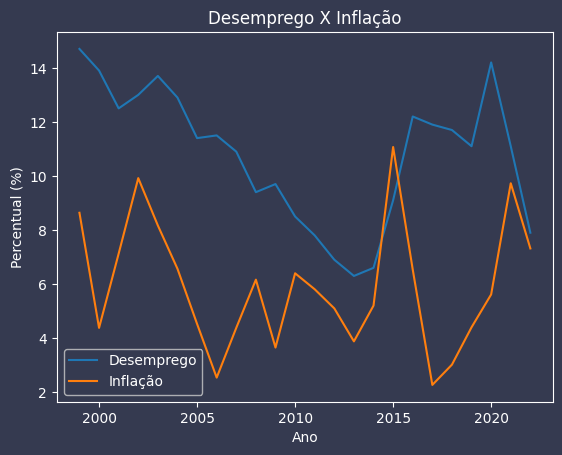

In [32]:
sns.lineplot(data=df_phil, x="YEAR", y="Desemprego", label="Desemprego")
sns.lineplot(data=df_phil, x="YEAR", y="Inflação", label="Inflação")
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Percentual (%)')
plt.title('Desemprego X Inflação')

Text(0.5, 1.0, 'Curva de Phillips')

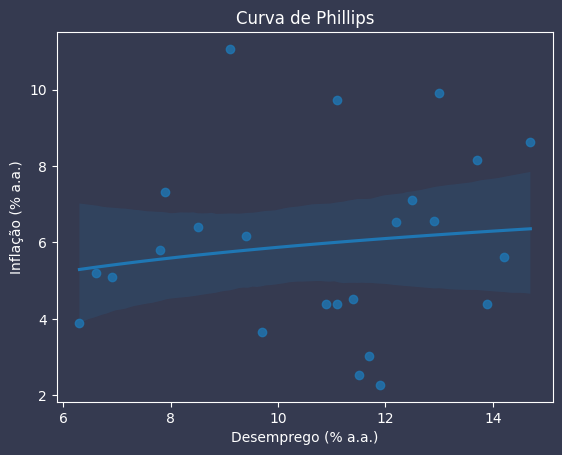

In [33]:
sns.regplot(data=df_phil, x="Desemprego", y="Inflação", logx=True)
plt.xlabel('Desemprego (% a.a.)')
plt.ylabel('Inflação (% a.a.)')
plt.title('Curva de Phillips')

Analisando o gráfico acima, nota-se que não há relação direta no comportamento entre desemprego e inflação dos dados obtidos, uma vez que a distribuição dos pontos apresenta padrão aleatório. Pode-se atribuir o comportamento independente das métricas dado variáveis exógenas, como por exemplo crises e cenários político-economicos.

Nota-se que a economia brasileira no período de 1999 à 2022, analisando ano a ano, não segue a curva de Philips como nos modelos idealizados.

## **Q2. Pergunta 2.** Existe correlação entre as séries históricas do IPCA e SELIC?

In [34]:
df_merged.corr()

,DATE,IPCA ((% a.m.)),selic ((% a.m.)),PIB (US$)
DATE,1.000000,-0.481661,-0.485602,0.876069
IPCA ((% a.m.)),-0.481661,1.000000,0.964616,-0.448043
selic ((% a.m.)),-0.485602,0.964616,1.000000,-0.439549
PIB (US$),0.876069,-0.448043,-0.439549,1.000000


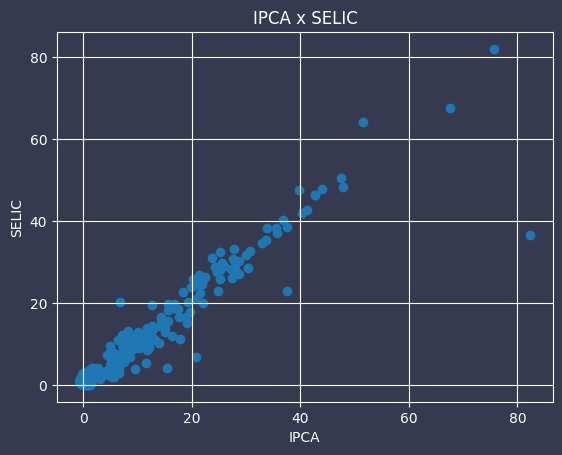

In [35]:
plt.scatter(df_merged["IPCA ((% a.m.))"],df_merged["selic ((% a.m.))"])
plt.title('IPCA x SELIC')
plt.xlabel('IPCA')
plt.ylabel('SELIC')
plt.grid(True)
plt.show()

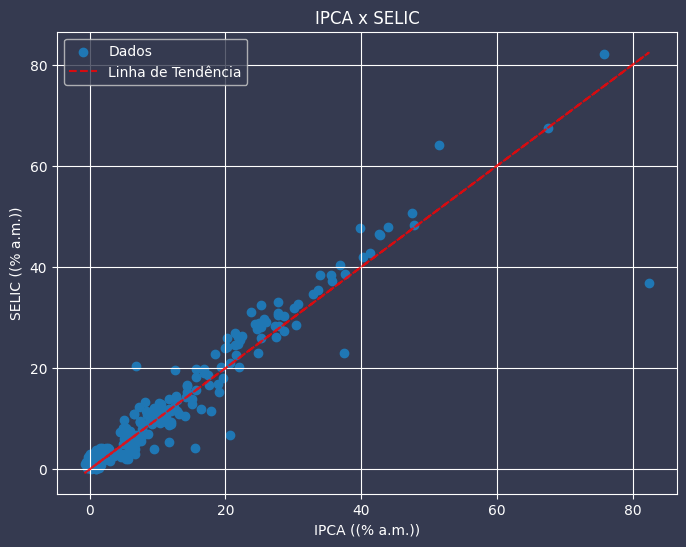

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(df_merged["IPCA ((% a.m.))"], df_merged["selic ((% a.m.))"], label='Dados')

z = np.poly1d(np.polyfit(df_merged["IPCA ((% a.m.))"], df_merged["selic ((% a.m.))"], 1))

plt.plot(df_merged["IPCA ((% a.m.))"], (df_merged["IPCA ((% a.m.))"]), color='red', linestyle='--', label='Linha de Tendência', alpha=0.8)
plt.title('IPCA x SELIC')
plt.xlabel('IPCA ((% a.m.))')
plt.ylabel('SELIC ((% a.m.))')
plt.legend()
plt.grid(True)
plt.show()

### **Conclusão**
A IPCA e a SELIC tem alta correlação


É observável uma grande relação entre a taxa SELIC e o IPCA, o que era esperado devido ao fato da taxa SELIC ser uma ferramenta fundamental de política monetária utilizada pelo Banco Central do Brasil para controlar a inflação.

A SELIC, sendo a taxa básica de juros da economia, influencia diretamente o custo do crédito e, consequentemente, o nível de consumo e investimento no país. Quando a inflação, medida pelo IPCA, começa a subir acima da meta estabelecida pelo Banco Central, a autoridade monetária pode aumentar a SELIC para tornar o crédito mais caro. Isso desestimula o consumo e os investimentos, reduzindo a demanda agregada e ajudando a controlar os preços.

# Inflação por Área 

## **Q3. Pergunta 3.** Qual período teve mais inflação?

In [37]:
df_IpcaCategorias.columns

Index(['IPCA - alimentos e bebidas - taxa de variação ((% a.m.))',
       'IPCA - artigos de residência - taxa de variação ((% a.m.))',
       'IPCA - despesas pessoais - taxa de variação ((% a.m.))',
       'IPCA - comunicação - taxa de variação ((% a.m.))',
       'IPCA - educação, leitura e papelaria - taxa de variação ((% a.m.))',
       'IPCA - geral - taxa de variação ((% a.m.))',
       'IPCA - habitação - taxa de variação ((% a.m.))',
       'IPCA - saúde e cuidados pessoais - taxa de variação ((% a.m.))',
       'IPCA - RMSP - taxa de variação ((% a.m.))',
       'IPCA - transportes - taxa de variação ((% a.m.))',
       'IPCA - vestuário - taxa de variação ((% a.m.))'],
      dtype='object')

In [38]:
df_IpcaCategorias.drop(df_IpcaCategorias.columns[8], axis=1, inplace=True)


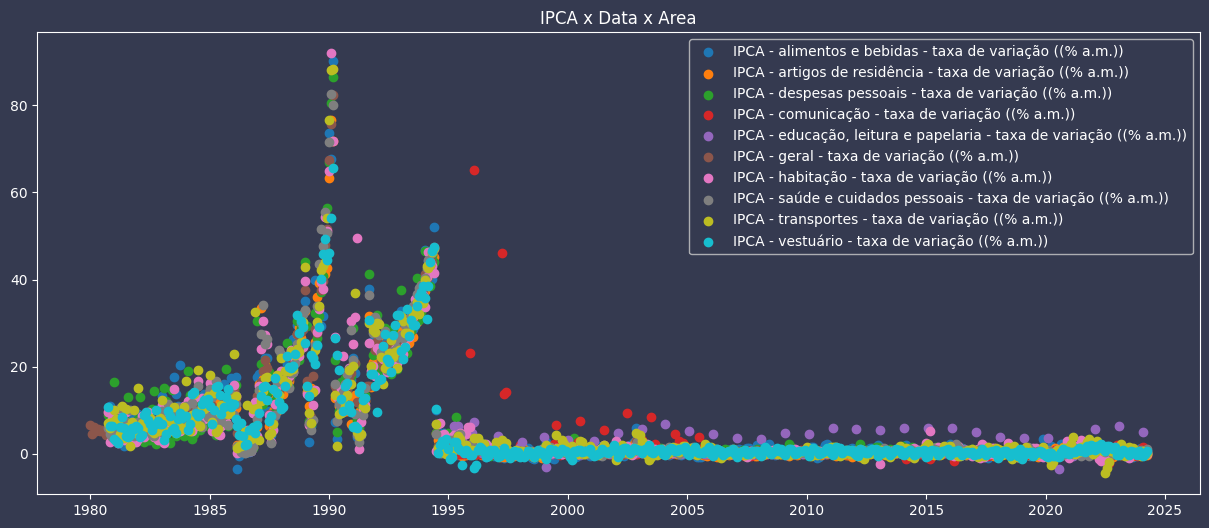

In [39]:
plt.figure(figsize=(15, 6))


for coluna in df_IpcaCategorias.columns:
    plt.scatter(df_IpcaCategorias.index,df_IpcaCategorias[coluna], label=coluna)
plt.legend()
plt.title("IPCA x Data x Area")
plt.show()



In [40]:
df_IpcaCategorias.describe()

,IPCA - alimentos e bebidas - taxa de variação ((% a.m.)),IPCA - artigos de residência - taxa de variação ((% a.m.)),IPCA - despesas pessoais - taxa de variação ((% a.m.)),IPCA - comunicação - taxa de variação ((% a.m.)),"IPCA - educação, leitura e papelaria - taxa de variação ((% a.m.))",IPCA - geral - taxa de variação ((% a.m.)),IPCA - habitação - taxa de variação ((% a.m.)),IPCA - saúde e cuidados pessoais - taxa de variação ((% a.m.)),IPCA - transportes - taxa de variação ((% a.m.)),IPCA - vestuário - taxa de variação ((% a.m.))
count,522.000000,522.000000,522.000000,351.000000,351.000000,532.000000,522.000000,522.000000,522.000000,522.000000
mean,5.784521,5.420939,5.953544,0.759288,0.663134,5.770901,5.884521,5.940805,5.894540,5.474732
std,11.208376,10.612734,11.377269,4.635516,1.485451,10.731473,11.123721,11.591793,11.493737,10.128524
min,-3.490000,-1.370000,-0.570000,-2.080000,-3.470000,-0.680000,-2.380000,-0.710000,-4.510000,-3.280000
25%,0.240000,0.110000,0.360000,0.000000,0.050000,0.370000,0.340000,0.390000,0.212500,0.232500
50%,0.885000,0.570000,0.700000,0.040000,0.150000,0.750000,0.780000,0.670000,0.850000,0.845000
75%,5.660000,6.295000,5.827500,0.265000,0.430000,6.642157,6.197500,6.177500,6.180000,6.390000
max,90.230000,76.690000,86.580000,65.160000,7.340000,82.390000,91.980000,82.700000,88.340000,65.600000


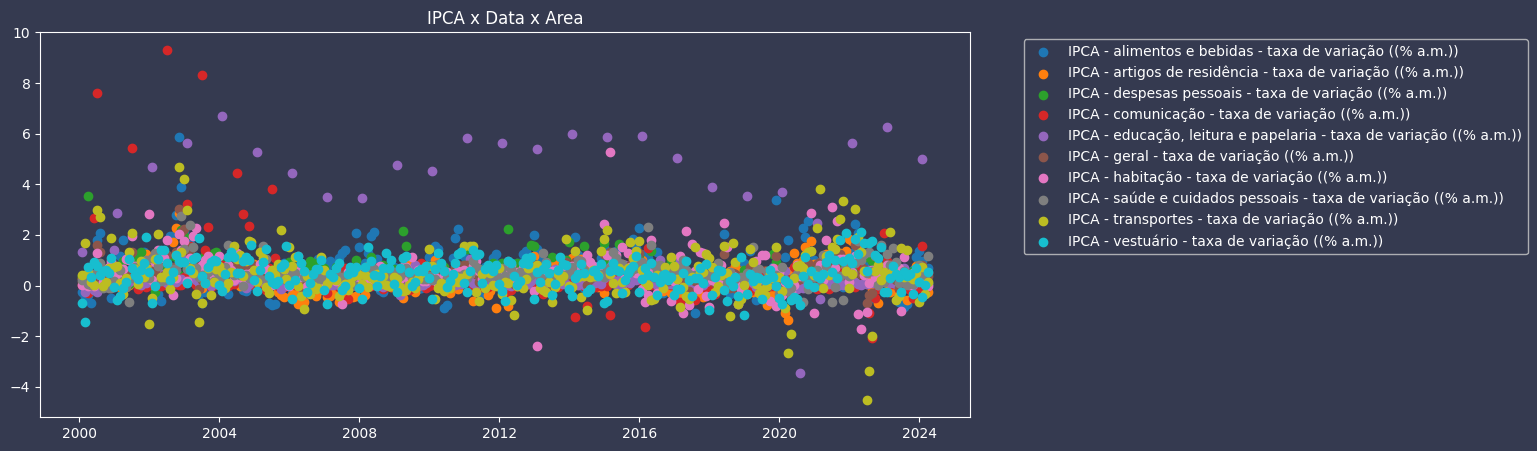

In [41]:
df_IpcaCategorias2000 = df_IpcaCategorias[df_IpcaCategorias.index >'2000-01-01']
plt.figure(figsize=(12, 5))
for coluna in df_IpcaCategorias2000.columns:
    plt.scatter(df_IpcaCategorias2000.index,df_IpcaCategorias2000[coluna], label=coluna)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("IPCA x Data x Area")
plt.show()



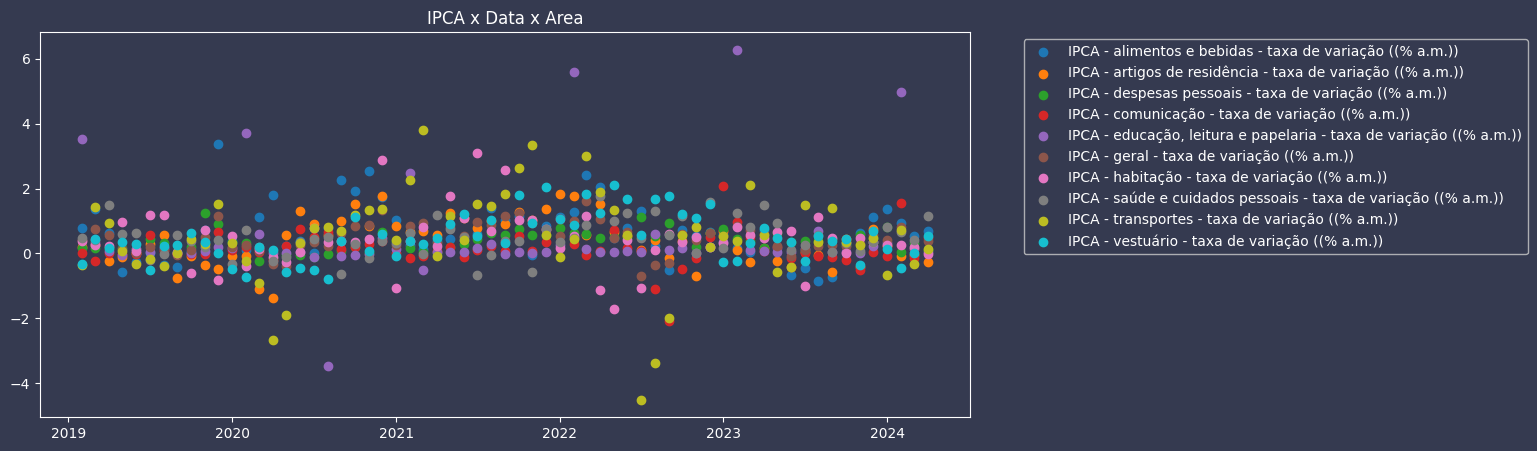

In [42]:
df_IpcaCategoriasCovid = df_IpcaCategorias[df_IpcaCategorias.index >'2019-01-01']
plt.figure(figsize=(12, 5))
for coluna in df_IpcaCategoriasCovid.columns:
    plt.scatter(df_IpcaCategoriasCovid.index,df_IpcaCategoriasCovid[coluna], label=coluna)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("IPCA x Data x Area")
plt.show()



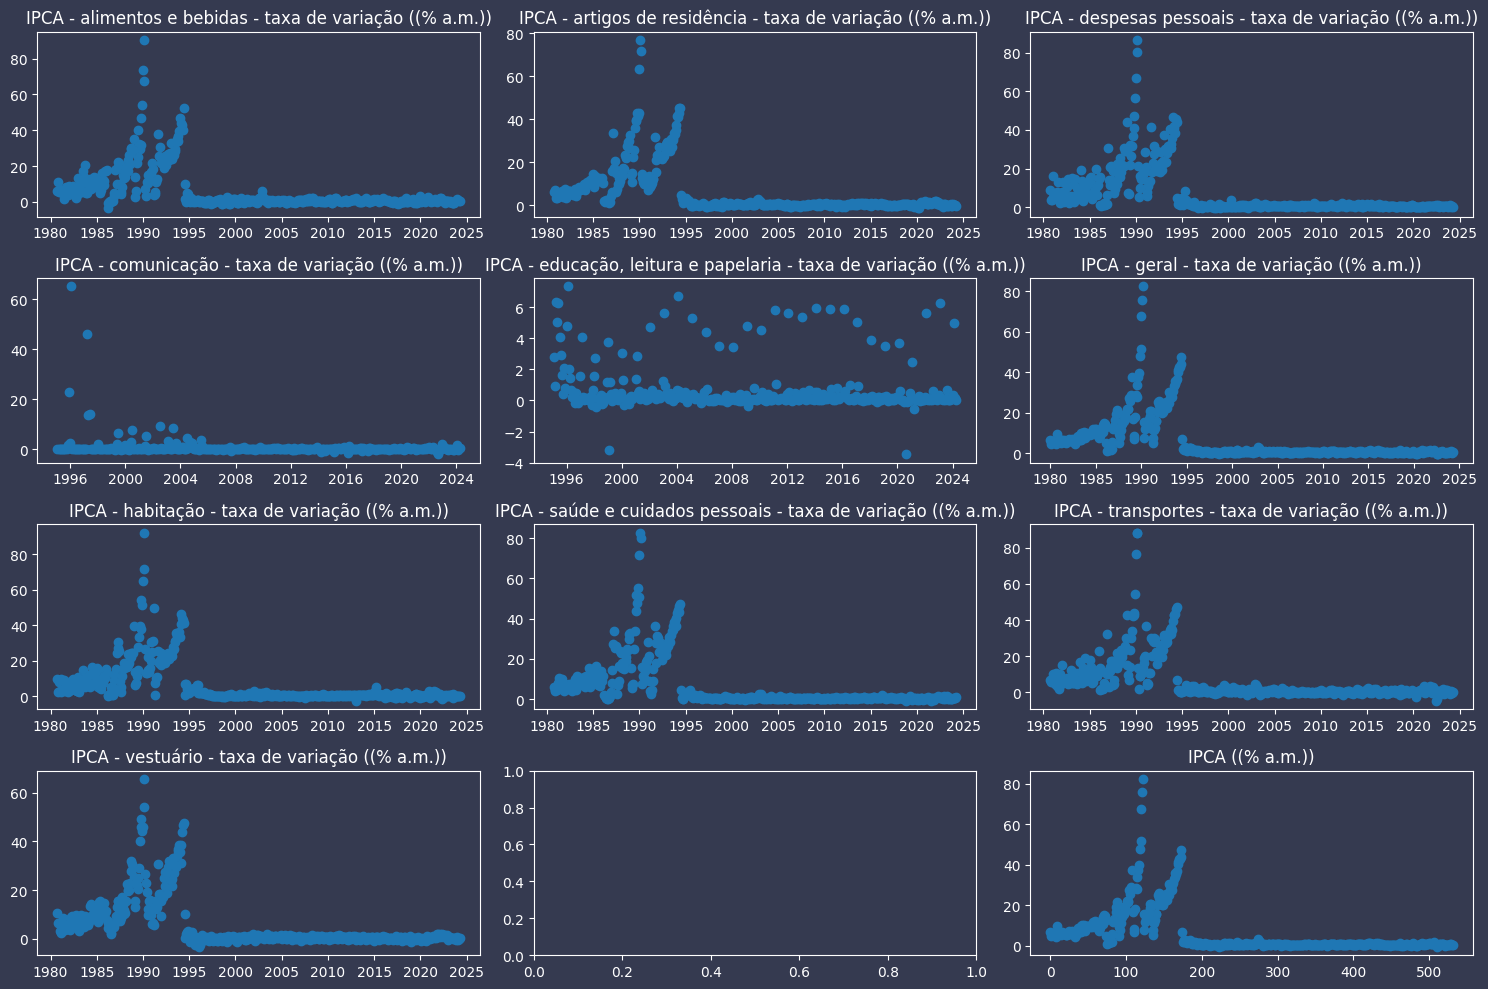

In [43]:
num_linhas = 4
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

for i, coluna in enumerate(df_IpcaCategorias.columns):
    linha = i // num_colunas
    coluna_subplot = i % num_colunas
    axs[linha, coluna_subplot].scatter(df_IpcaCategorias.index, df_IpcaCategorias[coluna])
    axs[linha, coluna_subplot].set_title(coluna)
axs[3, 2].scatter(df_ipca_limpo.index,df_ipca_limpo["IPCA ((% a.m.))"])
axs[3, 2].set_title("IPCA ((% a.m.))")
plt.tight_layout() 
plt.show()



### **Conclusão**
Foi observado que o periodo que mais teve inflação em todas as áreas e que teve maior variação na taxa de inflação foi o periodo de 1985 até 1995.
Nota-se que todas as áreas exceto as de comunicação e educação, leitura e papelaria seguem um padrão similar ao decorrer dos anos.

## **Q4. Pergunta 4.** Quais áreas tem maior correlação entre si?

In [44]:
df_IpcaCategorias

,IPCA - alimentos e bebidas - taxa de variação ((% a.m.)),IPCA - artigos de residência - taxa de variação ((% a.m.)),IPCA - despesas pessoais - taxa de variação ((% a.m.)),IPCA - comunicação - taxa de variação ((% a.m.)),"IPCA - educação, leitura e papelaria - taxa de variação ((% a.m.))",IPCA - geral - taxa de variação ((% a.m.)),IPCA - habitação - taxa de variação ((% a.m.)),IPCA - saúde e cuidados pessoais - taxa de variação ((% a.m.)),IPCA - transportes - taxa de variação ((% a.m.)),IPCA - vestuário - taxa de variação ((% a.m.))
DATE,,,,,,,,,,
1980-01-01,NaN,NaN,NaN,NaN,NaN,6.615649,NaN,NaN,NaN,NaN
1980-02-01,NaN,NaN,NaN,NaN,NaN,4.616919,NaN,NaN,NaN,NaN
1980-03-01,NaN,NaN,NaN,NaN,NaN,6.038389,NaN,NaN,NaN,NaN
1980-04-01,NaN,NaN,NaN,NaN,NaN,5.286114,NaN,NaN,NaN,NaN
1980-05-01,NaN,NaN,NaN,NaN,NaN,5.702721,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-01,1.11,0.76,0.48,0.04,0.24,0.560000,0.34,0.35,0.48,0.70
2024-01-01,1.38,0.22,0.82,-0.08,0.33,0.420000,0.25,0.83,-0.65,0.14
2024-02-01,0.95,-0.07,0.05,1.56,4.98,0.830000,0.27,0.65,0.72,-0.44


In [45]:
df_IpcaCategorias.corr()

,IPCA - alimentos e bebidas - taxa de variação ((% a.m.)),IPCA - artigos de residência - taxa de variação ((% a.m.)),IPCA - despesas pessoais - taxa de variação ((% a.m.)),IPCA - comunicação - taxa de variação ((% a.m.)),"IPCA - educação, leitura e papelaria - taxa de variação ((% a.m.))",IPCA - geral - taxa de variação ((% a.m.)),IPCA - habitação - taxa de variação ((% a.m.)),IPCA - saúde e cuidados pessoais - taxa de variação ((% a.m.)),IPCA - transportes - taxa de variação ((% a.m.)),IPCA - vestuário - taxa de variação ((% a.m.))
IPCA - alimentos e bebidas - taxa de variação ((% a.m.)),1.000000,0.965529,0.963531,-0.065170,0.001862,0.982145,0.932775,0.962528,0.959585,0.936959
IPCA - artigos de residência - taxa de variação ((% a.m.)),0.965529,1.000000,0.958348,-0.035944,0.174272,0.981537,0.948353,0.974256,0.960652,0.965443
IPCA - despesas pessoais - taxa de variação ((% a.m.)),0.963531,0.958348,1.000000,0.073417,0.331470,0.974970,0.936060,0.957655,0.955007,0.926296
IPCA - comunicação - taxa de variação ((% a.m.)),-0.065170,-0.035944,0.073417,1.000000,0.173654,0.134425,0.172611,0.073758,0.251753,-0.228721
"IPCA - educação, leitura e papelaria - taxa de variação ((% a.m.))",0.001862,0.174272,0.331470,0.173654,1.000000,0.318455,0.170319,0.317564,0.128595,-0.251011
IPCA - geral - taxa de variação ((% a.m.)),0.982145,0.981537,0.974970,0.134425,0.318455,1.000000,0.964920,0.979545,0.979083,0.954977
IPCA - habitação - taxa de variação ((% a.m.)),0.932775,0.948353,0.936060,0.172611,0.170319,0.964920,1.000000,0.955908,0.949426,0.913738
IPCA - saúde e cuidados pessoais - taxa de variação ((% a.m.)),0.962528,0.974256,0.957655,0.073758,0.317564,0.979545,0.955908,1.000000,0.958915,0.941784
IPCA - transportes - taxa de variação ((% a.m.)),0.959585,0.960652,0.955007,0.251753,0.128595,0.979083,0.949426,0.958915,1.000000,0.920895
IPCA - vestuário - taxa de variação ((% a.m.)),0.936959,0.965443,0.926296,-0.228721,-0.251011,0.954977,0.913738,0.941784,0.920895,1.000000


In [46]:
# Define the function to apply to each column title
def transform_column_name(col):
    return col.split('-')[1].lstrip().capitalize()

# Apply the function to each column title
df_IpcaCategoriasSimplificado = df_IpcaCategorias.rename(columns=lambda x: transform_column_name(x))

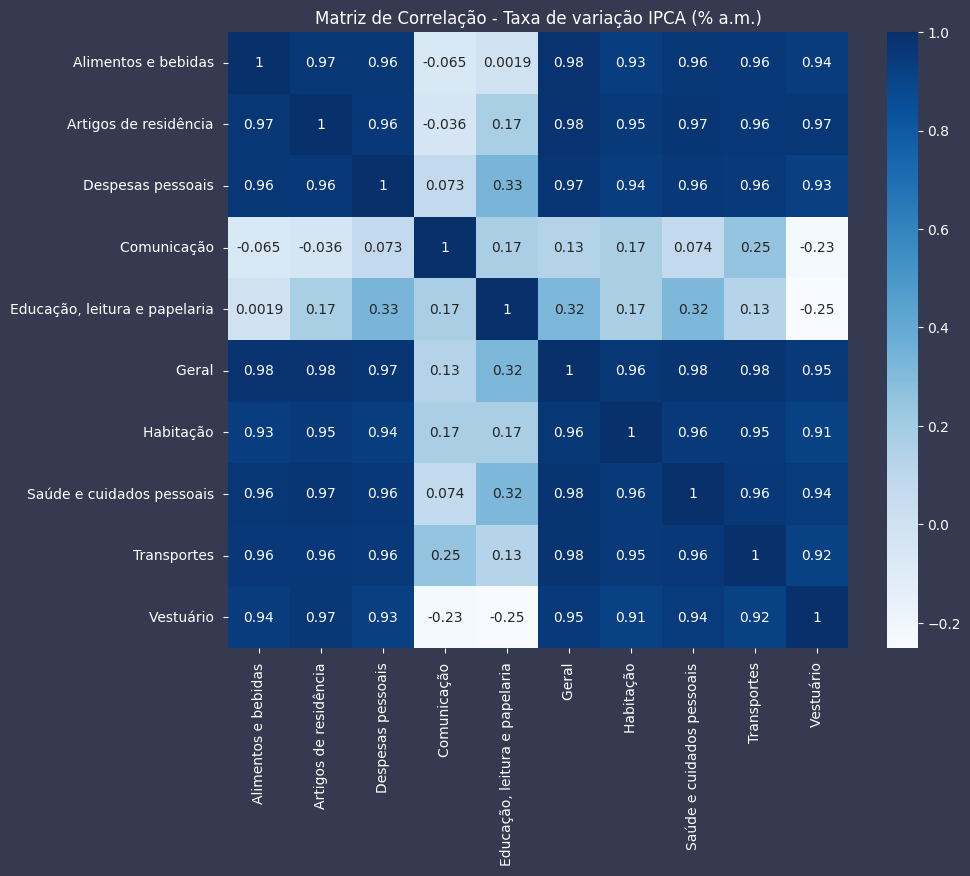

In [47]:
correlacao = df_IpcaCategoriasSimplificado.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='Blues')

plt.title('Matriz de Correlação - Taxa de variação IPCA (% a.m.)')
plt.show()

### **Conclusão**
Como demonstrado na análise anterior, quase todas as áreas se comportam de maneira bem similar entre si. Portanto era esperado que seja obtido um indice de correlação alto, por execão das mesmas citadas anteriormente (comunicação, educação, leitura e papelaria) 


## **Q5. Pergunta 5.** Quais áreas tiveram mais inflação?

In [48]:
df_IpcaCategorias_Total =  df_IpcaCategorias.loc["2014-04-01":"2024-04-01"].copy()
df_IpcaCategorias_Total.iloc[0,:] = 0

for col in df_IpcaCategorias_Total.columns:
    for i in range(1, len(df_IpcaCategorias_Total)):
        valor_anterior = df_IpcaCategorias_Total.loc[df_IpcaCategorias_Total.index[i-1], col]
        valor_atual = df_IpcaCategorias_Total.loc[df_IpcaCategorias_Total.index[i], col]
        df_IpcaCategorias_Total.loc[df_IpcaCategorias_Total.index[i], col] = ((valor_anterior/100 + 1) * (valor_atual/100+1) - 1)*100
df_IpcaCategorias_Total

,IPCA - alimentos e bebidas - taxa de variação ((% a.m.)),IPCA - artigos de residência - taxa de variação ((% a.m.)),IPCA - despesas pessoais - taxa de variação ((% a.m.)),IPCA - comunicação - taxa de variação ((% a.m.)),"IPCA - educação, leitura e papelaria - taxa de variação ((% a.m.))",IPCA - geral - taxa de variação ((% a.m.)),IPCA - habitação - taxa de variação ((% a.m.)),IPCA - saúde e cuidados pessoais - taxa de variação ((% a.m.)),IPCA - transportes - taxa de variação ((% a.m.)),IPCA - vestuário - taxa de variação ((% a.m.))
DATE,,,,,,,,,,
2014-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-05-01,0.580000,1.030000,0.800000,0.110000,0.130000,0.460000,0.610000,0.980000,-0.450000,0.840000
2014-06-01,0.469362,1.413914,2.382560,0.089978,0.150026,0.861840,1.163355,1.585880,-0.081665,1.334116
2014-07-01,0.318658,2.286074,2.505419,-0.700733,0.190086,0.871926,2.377315,2.093809,-1.060865,1.090914
2014-08-01,0.168180,2.766818,2.597674,-0.601434,0.620903,1.124106,3.339662,2.512394,-0.734366,0.939278
...,...,...,...,...,...,...,...,...,...,...
2023-12-01,89.536949,47.279575,67.372104,12.971994,72.050834,72.589240,86.857315,84.279699,70.357685,54.526016
2024-01-01,92.152558,47.603590,68.744555,12.881616,72.618602,73.314114,87.324458,85.809221,69.250360,54.742353
2024-02-01,93.978008,47.500268,68.828928,14.642569,81.215008,74.752622,87.830234,87.016980,70.468962,54.061486


In [49]:
df_IpcaCategorias_Total.tail(1)

,IPCA - alimentos e bebidas - taxa de variação ((% a.m.)),IPCA - artigos de residência - taxa de variação ((% a.m.)),IPCA - despesas pessoais - taxa de variação ((% a.m.)),IPCA - comunicação - taxa de variação ((% a.m.)),"IPCA - educação, leitura e papelaria - taxa de variação ((% a.m.))",IPCA - geral - taxa de variação ((% a.m.)),IPCA - habitação - taxa de variação ((% a.m.)),IPCA - saúde e cuidados pessoais - taxa de variação ((% a.m.)),IPCA - transportes - taxa de variação ((% a.m.)),IPCA - vestuário - taxa de variação ((% a.m.))
DATE,,,,,,,,,,
2024-04-01,96.371134,47.05792,69.555449,15.043103,81.559444,75.697348,88.168293,89.999879,70.144284,54.955297


Text(0.5, 0, '%')

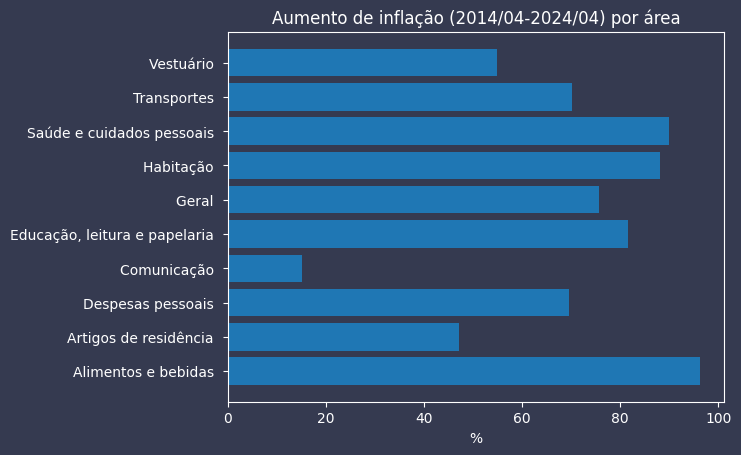

In [50]:

categorias= []
for coluna in df_IpcaCategorias_Total.columns:
  categorias.append(coluna.split('-')[1].lstrip().capitalize())

plt.barh(categorias, df_IpcaCategorias_Total.iloc[-1])
plt.title("Aumento de inflação (2014/04-2024/04) por área")
plt.xlabel("%")

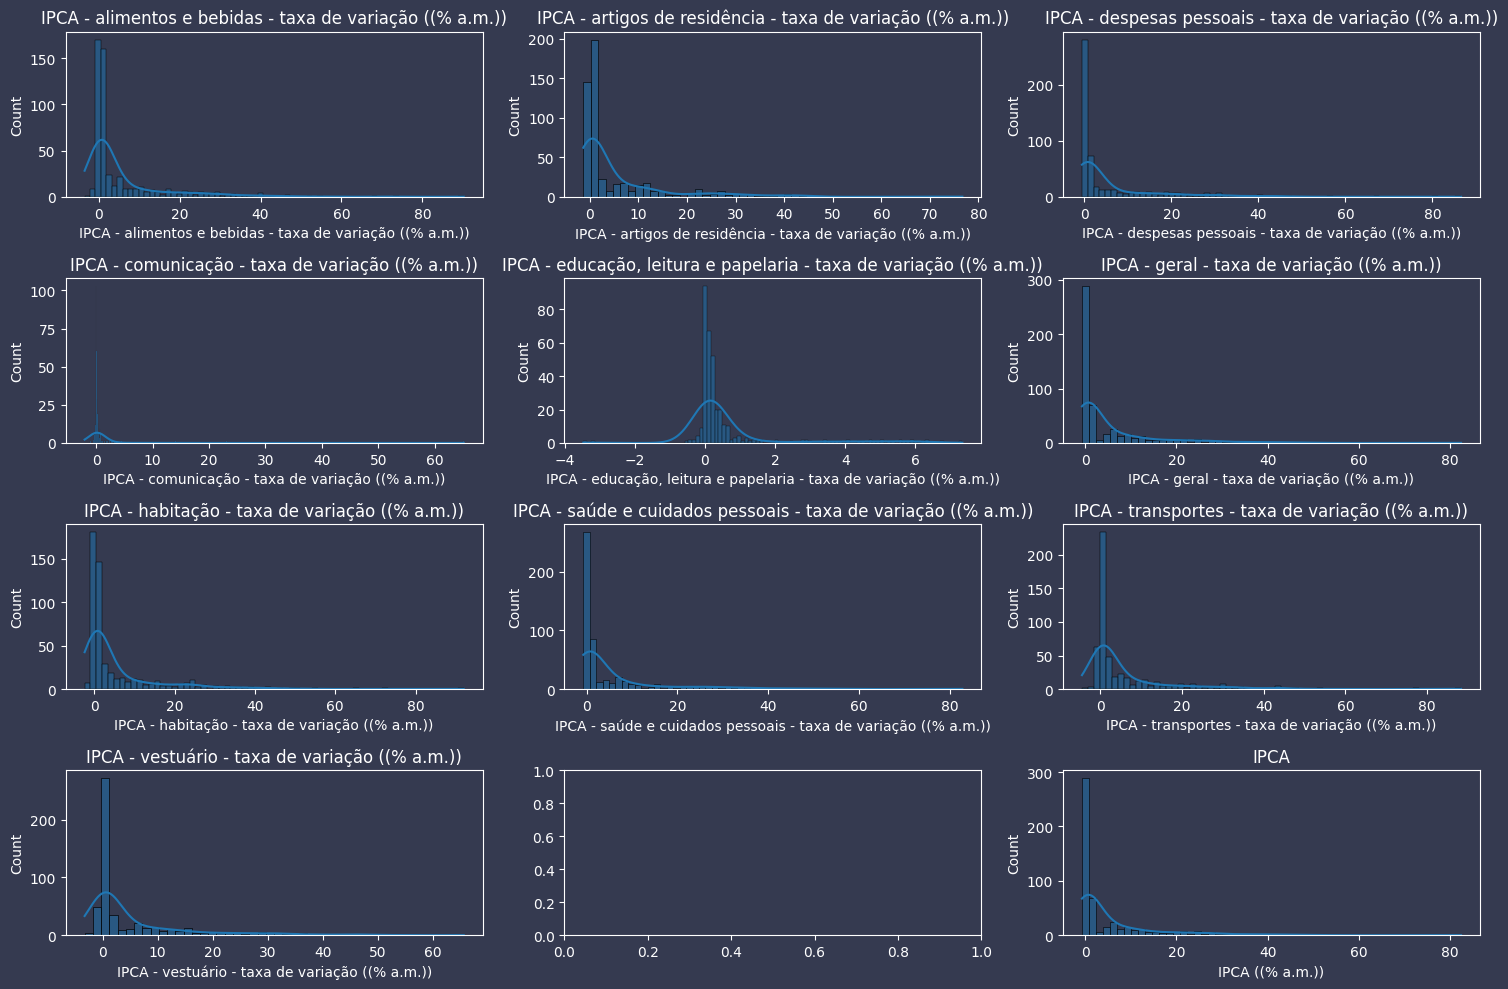

In [51]:
num_linhas = 4
num_colunas = 3

num_subplots = num_linhas * num_colunas

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

for i, coluna in enumerate(df_IpcaCategorias.columns):
    if i < num_subplots:  
        linha = i // num_colunas
        coluna_subplot = i % num_colunas
        sns.histplot(data=df_IpcaCategorias[coluna], ax=axs[linha, coluna_subplot], kde=True)
        axs[linha, coluna_subplot].set_title(coluna)
sns.histplot(data=df_ipca_limpo["IPCA ((% a.m.))"], ax=axs[3, 2], kde=True)
axs[3, 2].set_title("IPCA")
plt.tight_layout()
plt.show()

### **Conclusão**
Como é observável, durante o período de Abril de 2014 até Abril de 2024, o comportamento do IPCA foi liderado principalmente por bens essenciais. Adicionalmente, entende-se que os bens citados tiveram, nos últimos 10 anos, uma valorização de 100%.


## Tipos De Bens

In [52]:
df_ipcaBens

,IPCA - preços livres - bens duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - bens não duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - bens semi duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - serviços - taxa de variação ((% a.m.))
DATE,,,,
1992-01-01,29.15,28.12,13.80,25.84
1992-02-01,26.29,25.28,17.78,22.17
1992-03-01,21.07,22.16,19.09,20.74
1992-04-01,13.20,20.43,23.43,20.14
1992-05-01,21.67,26.10,23.89,26.93
...,...,...,...,...
2023-12-01,0.21,0.91,0.68,0.60
2024-01-01,0.21,1.41,0.33,0.02
2024-02-01,0.22,0.95,-0.26,1.06


#### Preços livres
Preços livres são aqueles que sofrem alteração por influência direta do mercado, como os preços de bens, enquanto preços administrados são aqueles influenciados ou definidos por parte de algum órgão público, independendo da oferta e demanda do mercado. Eles são classificados em bens duráveis, não duráveis, semi duráveis e serviços.

- Bens Duráveis :  Produtos com vida útil longa, utilizados repetidamente ao longo do tempo. Exemplos: eletrodomésticos, eletrônicos, veículos motorizados, móveis de qualidade.
- Bens Semiduráveis:Produtos com vida útil intermediária entre duráveis e não duráveis. Consumidos repetidamente, mas não duram tanto quanto duráveis. Exemplos: roupas de qualidade média, calçados, utensílios domésticos. 
- Bens Não Duráveis Produtos de curta duração, consumidos uma vez ou em poucas utilizações. Exemplos: alimentos perecíveis, produtos de limpeza, papelaria descartável.
- Serviços : Atividades intangíveis realizadas em troca de remuneração. Exemplos: transporte público, educação,saúde, lazer, serviços financeiros.

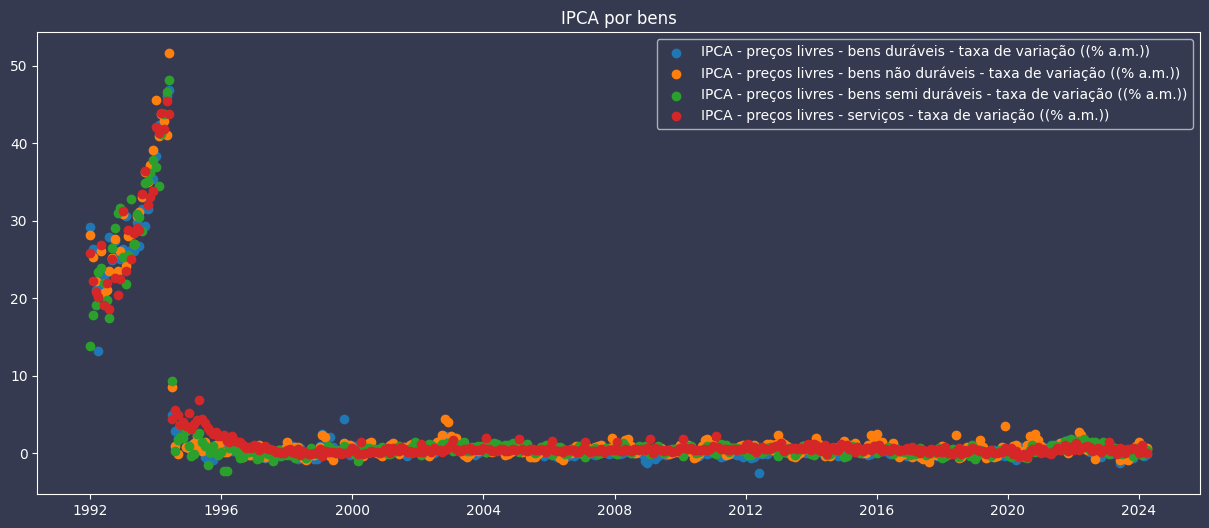

In [53]:
plt.figure(figsize=(15, 6))


for coluna in df_ipcaBens.columns:
    plt.scatter(df_ipcaBens.index,df_ipcaBens[coluna], label=coluna)
plt.legend()
plt.title("IPCA por bens")
plt.show()


In [54]:
df_ipcaBens.describe()

,IPCA - preços livres - bens duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - bens não duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - bens semi duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - serviços - taxa de variação ((% a.m.))
count,388.000000,388.000000,388.000000,388.000000
mean,2.567216,2.966856,2.712809,2.910593
std,8.276713,8.539873,8.230475,8.111171
min,-2.590000,-1.110000,-2.270000,-0.470000
25%,-0.070000,0.110000,0.127500,0.280000
50%,0.230000,0.610000,0.460000,0.490000
75%,0.690000,1.095000,0.902500,0.822500
max,46.840000,51.610000,48.200000,45.420000


## **Q6. Pergunta 6.** Qual período teve a maior inflação por bens?

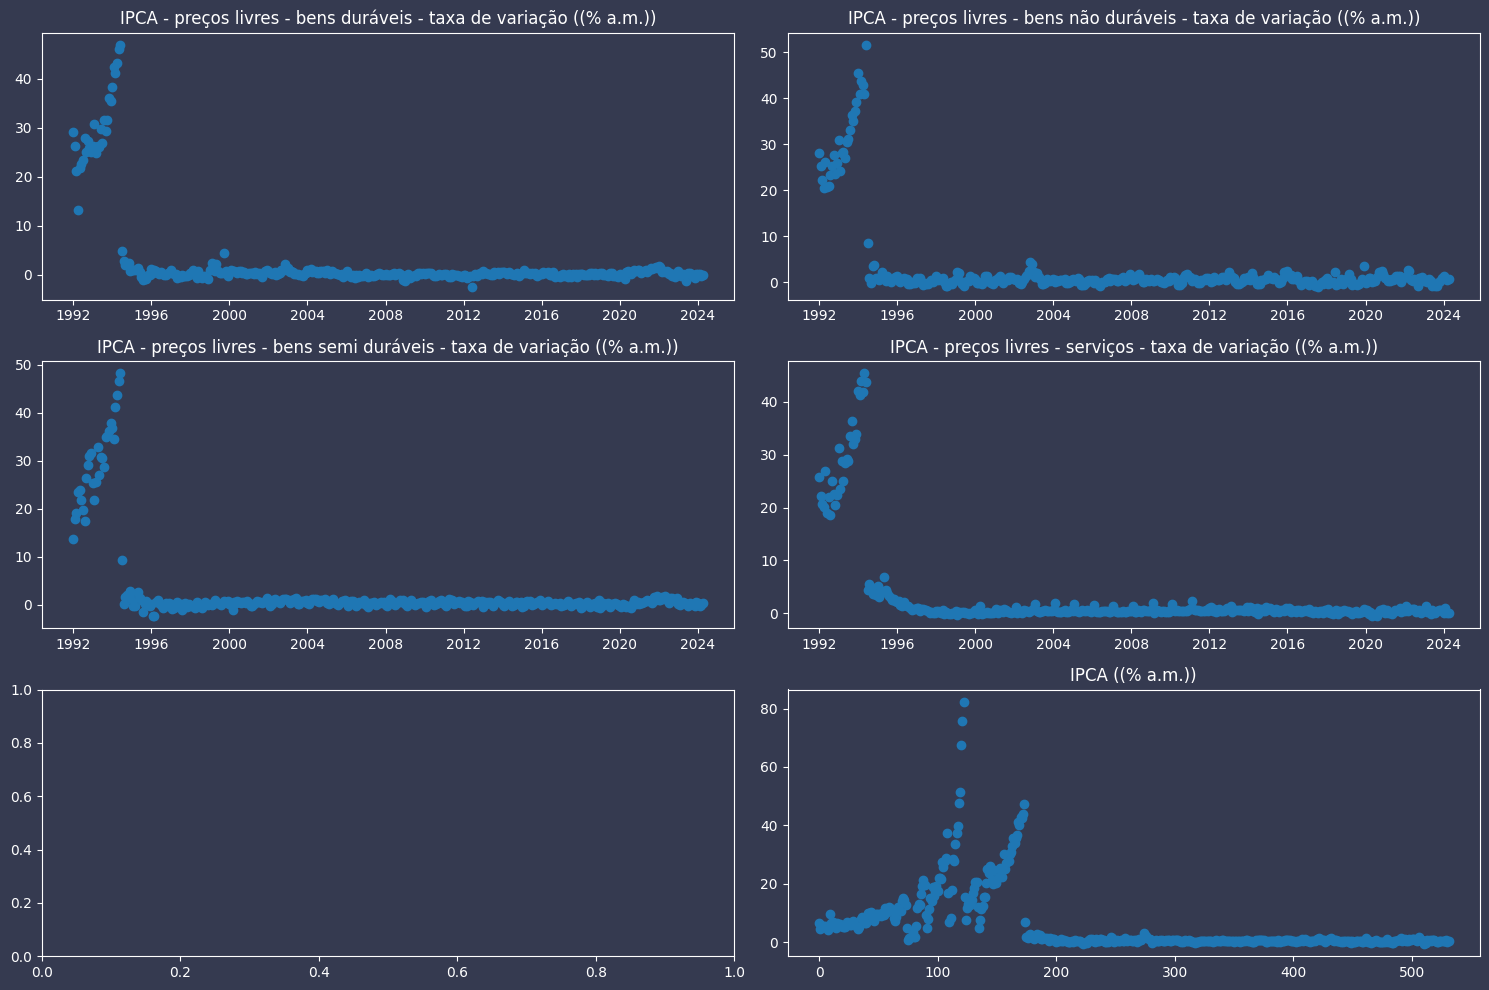

In [55]:
num_linhas = 3
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

for i, coluna in enumerate(df_ipcaBens.columns):
    linha = i // num_colunas
    coluna_subplot = i % num_colunas
    axs[linha, coluna_subplot].scatter(df_ipcaBens.index, df_ipcaBens[coluna])
    axs[linha, coluna_subplot].set_title(coluna)
axs[2, 1].scatter(df_ipca_limpo.index,df_ipca_limpo["IPCA ((% a.m.))"])
axs[2, 1].set_title("IPCA ((% a.m.))")
plt.tight_layout() 
plt.show()

### **Conclusão**
Foi observado que o periodo que mais teve inflação em todos os tipos e que teve maior variação na taxa de inflação foi o periodo de 1985 até 1995 


## **Q7. Pergunta 7.** Qual a correlacao entre as categorias de bens?

In [56]:
df_ipcaBens.corr()

,IPCA - preços livres - bens duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - bens não duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - bens semi duráveis - taxa de variação ((% a.m.)),IPCA - preços livres - serviços - taxa de variação ((% a.m.))
IPCA - preços livres - bens duráveis - taxa de variação ((% a.m.)),1.000000,0.989098,0.979232,0.984837
IPCA - preços livres - bens não duráveis - taxa de variação ((% a.m.)),0.989098,1.000000,0.983837,0.988437
IPCA - preços livres - bens semi duráveis - taxa de variação ((% a.m.)),0.979232,0.983837,1.000000,0.978987
IPCA - preços livres - serviços - taxa de variação ((% a.m.)),0.984837,0.988437,0.978987,1.000000


In [57]:
def transform_column_name2(col):
    return col.split('-')[2]

df_ipcaBensSimplificado = df_ipcaBens.rename(columns=lambda x: transform_column_name2(x))

In [58]:
df_ipcaBensSimplificado

,bens duráveis,bens não duráveis,bens semi duráveis,serviços
DATE,,,,
1992-01-01,29.15,28.12,13.80,25.84
1992-02-01,26.29,25.28,17.78,22.17
1992-03-01,21.07,22.16,19.09,20.74
1992-04-01,13.20,20.43,23.43,20.14
1992-05-01,21.67,26.10,23.89,26.93
...,...,...,...,...
2023-12-01,0.21,0.91,0.68,0.60
2024-01-01,0.21,1.41,0.33,0.02
2024-02-01,0.22,0.95,-0.26,1.06


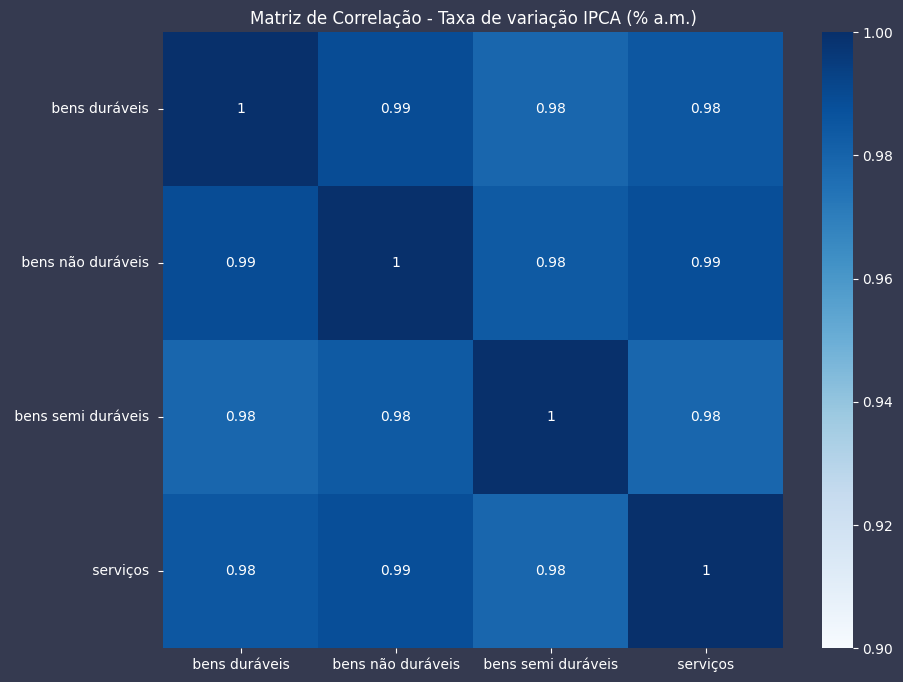

In [59]:
correlacao = df_ipcaBensSimplificado.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, cmap='Blues', vmin=0.9)

plt.yticks(rotation=0)
plt.title('Matriz de Correlação - Taxa de variação IPCA (% a.m.)')
plt.show()

### **Conclusão**
Diferentemente do IPCA visto por área, nos bens segue-se um padrão uniforme em todas as categorias, uma vez que a inflação por padrões de consumo é semelhante, dada a alta correlação entre os bens e serviços.

## **Q8. Pergunta 8.** Qual a distribuição dos retornos por bens?

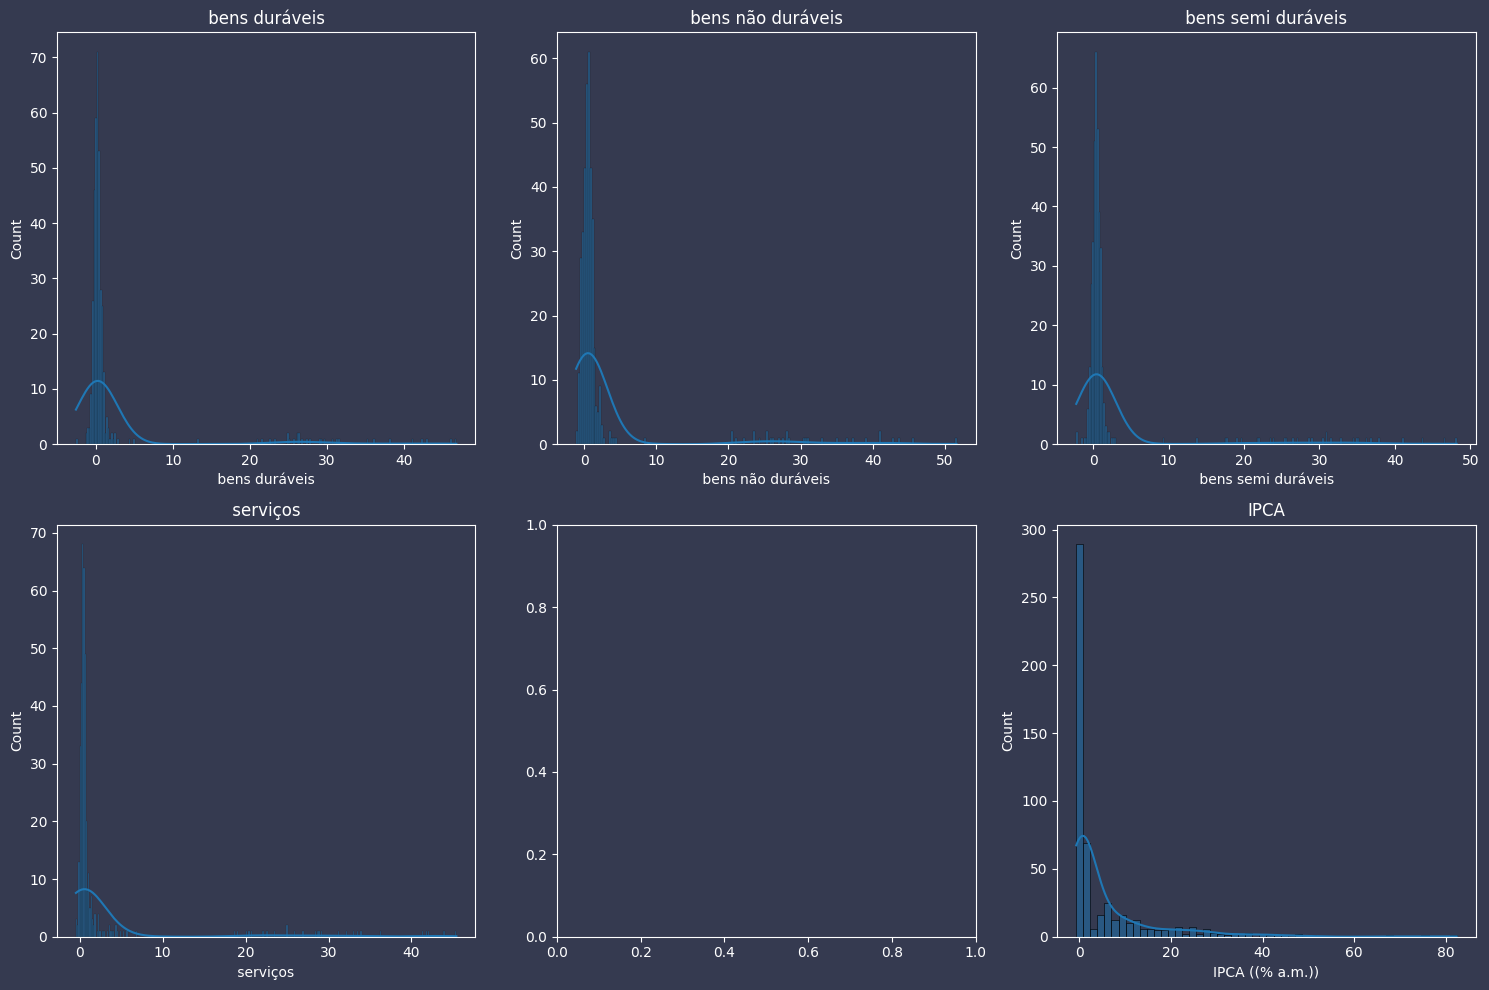

In [60]:
num_linhas = 2
num_colunas = 3

num_subplots = num_linhas * num_colunas

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

for i, coluna in enumerate(df_ipcaBensSimplificado.columns):
    if i < num_subplots:  
        linha = i // num_colunas
        coluna_subplot = i % num_colunas
        sns.histplot(data=df_ipcaBensSimplificado[coluna], ax=axs[linha, coluna_subplot], kde=True)
        axs[linha, coluna_subplot].set_title(coluna)
sns.histplot(data=df_ipca_limpo["IPCA ((% a.m.))"], ax=axs[1, 2], kde=True)
axs[1, 2].set_title("IPCA")
plt.tight_layout() 
plt.show()

### Conclusão
Tendo em vista os gráficos, foi possível notar que a  distribuição dos valores de IPCA gira em torno do valor 0, com cauda levemente à direita, demostrando uma inflação controlada com desvios positivos em suas taxas.


## **Q9. Pergunta 9.** O Banco central é bom em acertar suas previsoes?
## Meta Selic Vs Realizado


In [61]:
df_meta_selic

,DateTime,Meta para a taxa Selic
0,2000-05-25,18.50
1,2000-05-26,18.50
2,2000-05-27,18.50
3,2000-05-28,18.50
4,2000-05-29,18.50
...,...,...
8762,2024-05-21,10.50
8763,2024-05-22,10.50
8764,2024-05-23,10.50
8765,2024-05-24,10.50


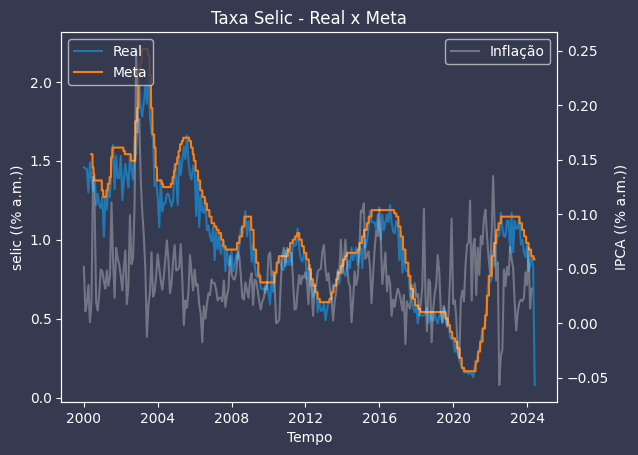

In [62]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

df_selic_2000 = df_selic_limpo[df_selic_limpo['DATE'] >= '2000-01-01 00:00:00']
df_ipca_limpo_2000 = df_ipca_limpo[df_ipca_limpo['DATE'] >= '2000-01-01 00:00:00']
df_meta_selic_mes = df_meta_selic
df_meta_selic_mes['Meta para a taxa Selic (aa)']=df_meta_selic['Meta para a taxa Selic'].apply(float)
sns.lineplot(data = df_ipca_limpo_2000, x=df_ipca_limpo_2000['DATE'], y=df_ipca_limpo_2000['IPCA ((% a.m.))'].div(12), sort=True, label="Inflação",ax=ax2,color="white",alpha=0.3)

sns.lineplot(data = df_selic_2000, x=df_selic_2000['DATE'], y=df_selic_2000['selic ((% a.m.))'], sort=True, label="Real",ax=ax1).set_title('Taxa Selic - Real x Meta')
sns.lineplot(data = df_meta_selic_mes, x=df_meta_selic_mes['DateTime'], y=df_meta_selic_mes['Meta para a taxa Selic (aa)'].div(12), sort=True, label="Meta",ax=ax1)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('Tempo')
plt.legend()
plt.show()

### Conclusão
O banco central, como agente regulador da economia, expõe suas intenções futuras através das metas, as quais buscam ser seguidas à medida do possível. Da mesma forma, a taxa de juros serve como ferramenta para dirigir a economia. No gráfico acima, compreende-se que os maiores níveis de juros são precedidos por um IPCA elevado, sofrendo uma queda após esse movimento de juros. 

## Q10. Pergunta 10. Como o PIB e a dívida pública se comportam diante das alterações da inflação?

In [63]:
df_divida_publica.index = pd.to_datetime(df_divida_publica.index) 

In [64]:
df_PIB

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1980-01-01,WEO_PIBWEOBRA,1980-01-01T00:00:00-02:00,1,1,1980,145.819
1981-01-01,WEO_PIBWEOBRA,1981-01-01T00:00:00-02:00,1,1,1981,167.583
1982-01-01,WEO_PIBWEOBRA,1982-01-01T00:00:00-02:00,1,1,1982,179.166
1983-01-01,WEO_PIBWEOBRA,1983-01-01T00:00:00-02:00,1,1,1983,143.652
1984-01-01,WEO_PIBWEOBRA,1984-01-01T00:00:00-02:00,1,1,1984,142.957
1985-01-01,WEO_PIBWEOBRA,1985-01-01T00:00:00-02:00,1,1,1985,226.938
1986-01-01,WEO_PIBWEOBRA,1986-01-01T00:00:00-02:00,1,1,1986,263.256
1987-01-01,WEO_PIBWEOBRA,1987-01-01T00:00:00-02:00,1,1,1987,286.539
1988-01-01,WEO_PIBWEOBRA,1988-01-01T00:00:00-02:00,1,1,1988,320.105


In [65]:
df_pib_divida = df_PIB.merge(df_divida_publica,left_index=True, right_index=True)

In [66]:
df_pib_divida['Divida Total (Bilhões USD)'] = df_pib_divida['VALUE (US$)'] * df_pib_divida['Dívida Pública (% PIB)']/100

In [67]:
df_pib_divida

,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$),Dívida Pública (% PIB),Divida Total (Bilhões USD)
1991-01-01,WEO_PIBWEOBRA,1991-01-01T00:00:00-02:00,1,1,1991,399.249,42.01,167.724505
1992-01-01,WEO_PIBWEOBRA,1992-01-01T00:00:00-02:00,1,1,1992,382.465,37.33,142.774184
1993-01-01,WEO_PIBWEOBRA,1993-01-01T00:00:00-02:00,1,1,1993,429.184,36.34,155.965466
1994-01-01,WEO_PIBWEOBRA,1994-01-01T00:00:00-02:00,1,1,1994,546.764,32.31,176.659448
1995-01-01,WEO_PIBWEOBRA,1995-01-01T00:00:00-02:00,1,1,1995,770.860,29.35,226.247410
1996-01-01,WEO_PIBWEOBRA,1996-01-01T00:00:00-02:00,1,1,1996,851.146,27.95,237.895307
1997-01-01,WEO_PIBWEOBRA,1997-01-01T00:00:00-02:00,1,1,1997,883.862,30.64,270.815317
1998-01-01,WEO_PIBWEOBRA,1998-01-01T00:00:00-02:00,1,1,1998,864.307,32.66,282.282666
1999-01-01,WEO_PIBWEOBRA,1999-01-01T00:00:00-02:00,1,1,1999,599.642,47.06,282.191525
2000-01-01,WEO_PIBWEOBRA,2000-01-01T00:00:00-02:00,1,1,2000,655.454,44.98,294.823209


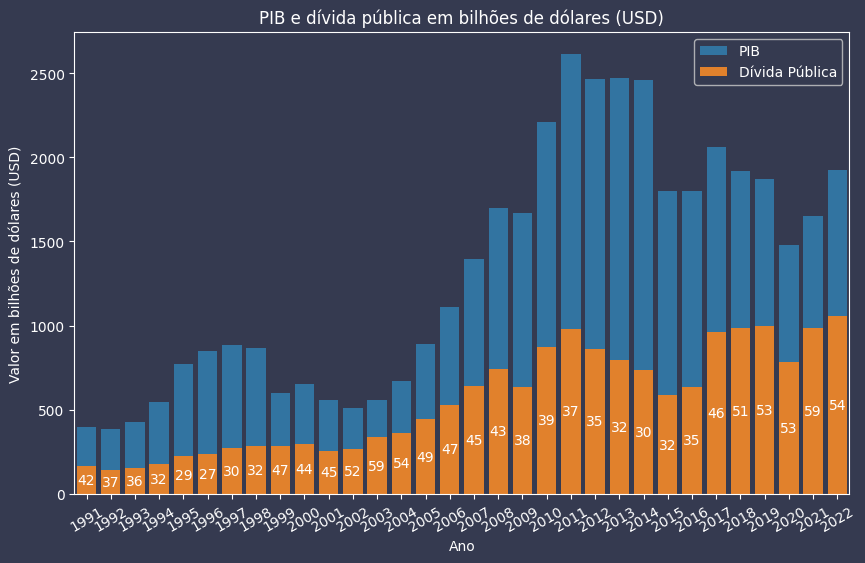

In [68]:
plt.figure(figsize=(10,6))
sns.barplot(data=df_pib_divida, x=df_pib_divida['YEAR'], y=df_pib_divida['VALUE (US$)'], label='PIB')
ax = sns.barplot(data=df_pib_divida, x=df_pib_divida['YEAR'], y=df_pib_divida['Divida Total (Bilhões USD)'], label='Dívida Pública')
plt.xticks(rotation=30)
ax.bar_label(ax.containers[1], labels=df_pib_divida['Dívida Pública (% PIB)'].astype(int), label_type='center');
plt.title('PIB e dívida pública em bilhões de dólares (USD)')
ax.set_xlabel('Ano')
ax.set_ylabel('Valor em bilhões de dólares (USD)')
plt.legend()
plt.show()

### Conclusão
Diante do gráfico, foi possível notar que ao longo dos anos a dívida apresentou um valor entre 30 a 50%, nos ultimos anos mais voltado aos 50% isso pode ser refletido na inflação, dada certa desconfiança do mercado em relação a capacidade brasileira do pagamento da dívida, além da sua notável necessidade de capital e viés de expansão.

# **Conclusões finais**
Após a análise dos dados relativos a Selic, IPCA, Inflação e outros aspectos econômicos, tornam-se evidentes algumas características triviais da Economia Brasileira. Compreender a interrelação entre esses fatores, seu impacto direto e indireto na vida contemporânea e sua influência no mercado é fundamental para desenvolver uma percepção crítica nas decisões e consequência das ações políticas as quais todos estão sujeitos. As tendências aqui apresentadas são úteis para observar o modus operandis do Governo Federal e Banco Central do Brasil, para assim criar uma projeção dos impactos que ambos podem causar na sociedade, a depender de suas políticas. 

Portanto as correlações apresentadas são imperativas para formar a base de analises economicas complexas, individuais ou pública, para todo tipo de interesse. Enfim, concluímos que para tornar essa análise ainda melhor, seria necessária uma relação entre os causadores e as reações do mercado, para assim capturar mais precisamente os quadros que fazem impacto na Economia.

# **Referências**

## Fontes de dados
Banco central do brasil (BACEN) - https://www.bcb.gov.br/estatisticas
Ipeadata - http://ipeadata.gov.br/Default.aspx
Instituto Brasileiro de Geografia e Estatística - https://www.ibge.gov.br/

# **Apêndice: Vídeo, GitHub e Datafólio**

## Vídeo

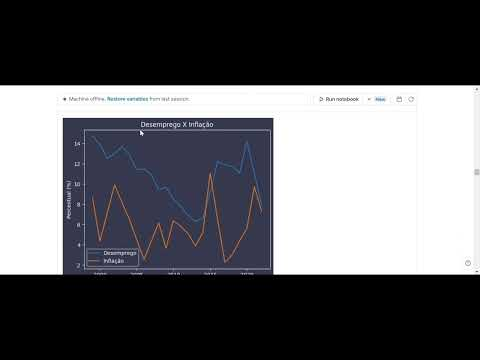

In [69]:
from IPython.display import YouTubeVideo
YouTubeVideo('tR0weAs6hWY')

https://youtu.be/tR0weAs6hWY?si=NVJ9MB0eanaQ21MV

## GitHub

<a href="https://github.com/CDIMT2024/tristeza">Github do projeto</a>

## Datafólio



<a href="https://github.com/CDIMT2024/tristeza/blob/main/datafolio.pdf">Datafólio</a>

# Avaliação professor

In [70]:
#@markdown
#@title **Avaliação**
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas 5-6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatísticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 1 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 10 #@param {type:"slider", min:0, max:10, step:1}
Video = 10 #@param {type:"slider", min:0, max:10, step:1}





In [71]:
#@markdown # **Nota Final**
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_ra = []
lista_nome = []

for i in range(1,7):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_nome.append(lista[0]); lista_ra.append(lista[1].upper())")

alunos['ra'] = lista_ra
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 11.0



,ra,nome,nota
0,20.01305-0,Ana Helena Arruda Cavalli Rosa Marcacini,11.0
1,19.00610-0,Enrico Giannobile,11.0
2,20.00387-0,Ettore Padula Dalben,11.0
3,20.00089-8,Guilherme de Campos Mello Guerra Martins,11.0
4,20.00171-0,Laura Caroline Pinto Correia,11.0
5,20.01937-8,Luis Guilherme de Souza Munhoz,11.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d2e07aa2-a36e-408c-858e-2f61ae2be422' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>